# AGN Selection Through Artificial Intelligence¶

This notebook performs AGN Selection through DC data via an Autoencoder. The frameworks used for this deep learning model are TensorFlow and Pytorch.


## Authors

* Ash Karale
    

## Contents:

* [I. Introduction](#one)
* [II. MNIST Experiment](#two)
* [IIa. MNIST AGN Experiment](#three)
* [III. AGN DC Experiment](#four)
* [IIIa. Data Acquisition](#five)
* [IIIb. Exploratory Data Analysis](#six)
* [IIIc. Data Processing](#seven)
* [IV. Autoencoder Experiments](#eight)
* [IVa. Model Definition](#nine)
* [IVb. Model Visualization](#ten)
* [IVc. Model Training](#eleven)
* [IVd. Model Output](#twelve)
* [V. Transfer Learning](#thirteen)

## Versions:

Initial Version: November 2022 (Ash Karale)

Latest Version: November 2023 (Ash Karale)



## I. Introduction <a class="anchor" id="one"></a>

With the upcoming Legacy Survey of Space and Time potentially identifying 40 billion celestial objects, our goal is to pinpoint the 100 million that are AGNs - a classic "needle-in-a- haystack" problem that requires sophisticated machine learning techniques to handle. We explore the use of autoencoders for AGN selection from data akin to the anticipated LSST survey. 

The data is gathered from the AGN Data Challenge which comprises of two primary sources known as the Sloan Digital Sky Survey Stripe 82, and the XMM-Large Scale Structure area. Furthermore, we explore the comparative effectiveness of TensorFlow and PyTorch in constructing autoencoders, providing an interface between computer science and astronomy.

### Visual Demonstration

Our primary goal is to gain a solid understanding of neural networks and a specialized type of them- autoencoders, so we can use them to do AGN science.

Neural networks are a cornerstone of artificial intelligence and machine learning. They draw inspiration from the human brain, using interconnected nodes or "neurons" to process information and make decisions. A neural network takes in inputs, which are processed in hidden layers using weights that are adjusted during training. The model then outputs a prediction. The weights are adjusted to find patterns in order to map inputs to outputs.


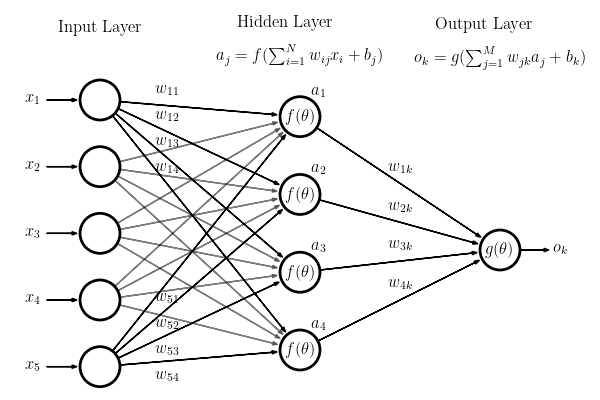

In [3]:
html_str_1 = f'<img src="data:image/png;base64,{image_base64_1}"/>'
display(HTML(html_str_1))

One particular type of neural network that we will delve deeper into is an autoencoder. Autoencoders are unsupervised learning models that are used for data compression, noise reduction, and feature extraction. They have an interesting architecture, consisting of an encoder that compresses the input data and a decoder that attempts to reconstruct the original input</font> from the compressed data.


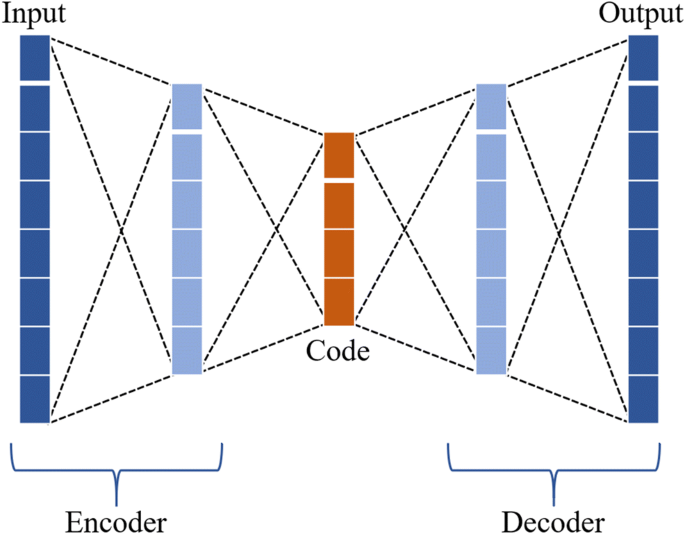

In [4]:
html_str_2 = f'<img src="data:image/png;base64,{image_base64_2}"/>'
display(HTML(html_str_2))

We will be implementing a simple autoencoder using the popular deep learning library, Keras, and the well-known MNIST dataset.

## II. MNIST Experiment <a class="anchor" id="two"></a>

We will use the famous MNIST dataset for the purpose of demonstration. Note that this dataset is used because of its simplicity and ready availability, though the concepts can be applied to more complex datasets, including those related to active galaxies in astronomy.

In Python, we use the Keras API which works on top of TensorFlow to implement our autoencoder:

The MNIST dataset contains 60,000 training images and 10,000 test images, each 28x28 pixels in size. By reshaping the data and normalizing pixel values to a [0,1] range, we prepare our input for the autoencoder. Although TensorFlow provides a flatten method, using reshape is a straightforward approach to convert the 2D image matrices into 1D vectors required for our dense neural network layers.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

We choose an encoding dimension of 32 to compress the input; this is a balance between retaining enough information and achieving meaningful compression. ReLU is selected for the encoder to introduce non-linearity, helping the model learn complex patterns without the vanishing gradient problem. For the decoder, we use a sigmoid activation because we want the output values to be in the range [0,1], the same as our input data.
The addition of a 128-node hidden layer before and after the encoding layer introduces additional levels of abstraction, allowing the network to learn more complex representations. This also enhances the "funneling" effect, where data is compressed down to a lower-dimensional latent space and then expanded back to its original dimension. This structure encourages the autoencoder to learn a more robust representation of the input data.

In [51]:
# The encoding dimension is a hyperparameter that defines the size of the compressed representation
encoding_dim = 32  

# input placeholder
input_img = Input(shape=(784,))

# Adding a hidden layer before the bottleneck
hidden_layer = Dense(128, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding a hidden layer after the bottleneck
hidden_layer_decoded = Dense(128, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

The adam optimizer is used for its adaptive learning rate capabilities, which help converge to the optimal set of weights more efficiently. We employ binary cross-entropy as the loss function, which is suited for a reconstruction task where the output is a probability in the range [0,1], representing the likelihood of each pixel being active (or white in this case).

In [52]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

The choice of 50 epochs is to give the model sufficient time to learn, as autoencoders typically require more epochs for training due to their complexity. A batch size of 256 is large enough for efficient processing and small enough to maintain a noisy gradient descent, which often helps in finding global minima. Shuffling the data ensures that each batch is different, which helps in preventing overfitting and makes the model more robust.

In [53]:
# Train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


2023-11-08 15:16:54.646530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1

229/235 [============================>.] - ETA: 0s - loss: 0.2794

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - ETA: 0s - loss: 0.2774

2023-11-08 15:16:58.859250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1

235/235 [==============================] - 6s 17ms/step - loss: 0.2774 - val_loss: 0.1904
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1712 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1446 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1285 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1182 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1108 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1054 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1016 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0972 - val_loss: 0.0953
Epoch 11/

The predict function applies the trained autoencoder to the test data, encoding and then decoding it to produce a reconstruction. This serves as a test to see how well the autoencoder can generalize to new, unseen data, given that it has learned a compact representation of the training data.

In [54]:
# Use the trained autoencoder to make predictions on the test data
# Here, we use the trained autoencoder to predict the test images. We input the flattened image arrays
# and the model outputs the reconstructed images. This is a process of encoding the original
# high-dimensional data into a lower-dimensional form and then decoding it back into the original space,
# inevitably losing some information but trying to minimize this loss.
decoded_imgs = autoencoder.predict(x_test)

  1/313 [..............................] - ETA: 54s

2023-11-08 15:18:14.874742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


Finally, we visualize 10 examples to qualitatively evaluate the autoencoder's performance. It's important to remember that the MNIST test dataset contains 10,000 images. Here, we're only sampling a small subset for visualization to check if the autoencoder is reconstructing digits that visually resemble the originals, despite the dimensionality reduction and subsequent information loss.

This gives us a solid foundation to start understanding how neural networks and autoencoders function. We can apply this same basic concept to selecting AGNs from the AGN DC Dataset.

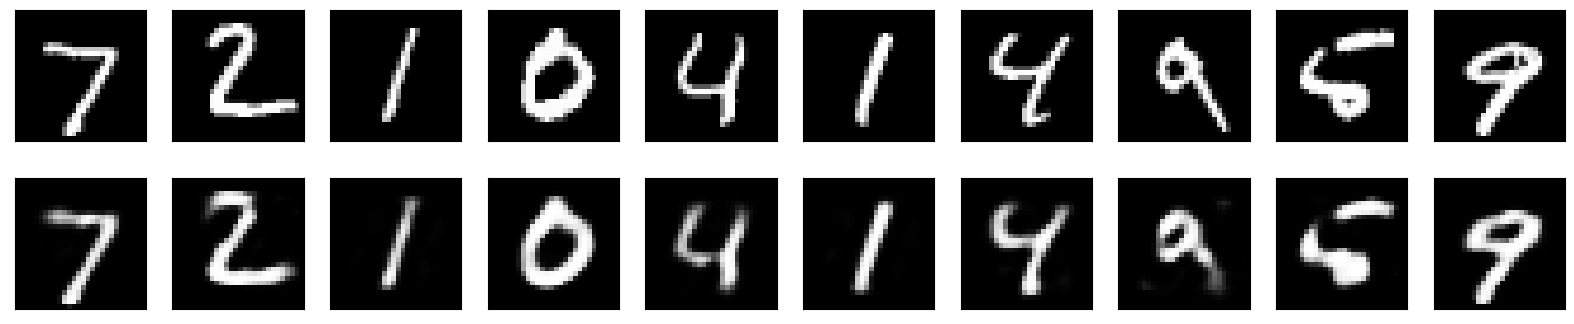

In [55]:
# Use Matplotlib to visualize the reconstructed inputs
import matplotlib.pyplot as plt

# The test dataset contains 10,000 images, but we'll only visualize a subset of 10 to see
# the reconstruction quality. This provides a quick check to ensure that our autoencoder is
# learning to compress and reconstruct the images effectively.
n = 10  # Number of digits to display as a sample from the test set

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    # The subplot below will display the reconstructed image that corresponds to the original image above.
    # It is reshaped back to 28x28 pixels from the flattened output of the autoencoder.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application to AGN DC Dataset: Understanding and Implementing Autoencoders

To understand how the process of using an autoencoder relates to our dataset—the AGN DC, which is the Sloan Digital Sky Survey (SDSS) Stripe 82, and the XMM-Large Scale Structure (XMM-LSS)—we need to consider the nature of the data and the benefits of the autoencoder model.

Our astronomical data sources provide us with a high-dimensional dataset. Each data point (e.g., an observed galaxy, star, or AGN) might come with several associated attributes such as its light curve features, astrometry, photometry, color, morphology, etc.

In this high-dimensional space, meaningful patterns or structures may not be immediately evident. Furthermore, as the data from these sources might not fully represent the diversity of astronomical objects that LSST will observe, direct application of supervised learning might lead to biased or incomplete models.

This is where autoencoders come into play. Autoencoders are a type of neural network that can learn to compress data into a lower-dimensional representation. In the encoding stage, the autoencoder learns to capture the most salient features of the data, effectively reducing its dimensionality. This process can help reveal underlying structure in the data that might be difficult to discern in the original high-dimensional space.

In the decoding stage, the autoencoder learns to reconstruct the original data from the compressed representation. By comparing the original data with the reconstructed data (as we do visually in the code block), we can get a sense of how well the autoencoder has learned to capture the essential features of the data.

The encoded representation, or the "latent space", holds a compressed form of the data that ideally captures its most important features. This latent space can then be used as input to a supervised classification algorithm, which can be more manageable and more effective than working with the original high-dimensional data.

So, in our case, the autoencoder serves two purposes:

i. It helps us explore and understand the structure of our high-dimensional astronomical data.

ii. It provides a form of unsupervised pre-training that can compensate for the underrepresentation in our training data. The autoencoder learns general features from the entire dataset, and this learning can then be fine-tuned with our specific but limited labeled data.

Thus, our visual comparison of original and autoencoder-reconstructed images (or data points) in the code block serves as an intuitive performance check for our model, indicating how well the autoencoder can capture the essential features of our complex astronomical dataset.

## IIa. MNIST AGN Experiment <a class="anchor" id="three"></a>

In the context of astronomy, each observation (or astronomical object) can be likened to an individual digit in the MNIST dataset, and each feature of this observation can be thought of as a pixel. However, unlike pixels in an image that combine to form a visual pattern, features in astronomical data do not inherently create a visual image but rather comprise a multi-dimensional feature space. Most astronomical data is non-image data, where each feature represents a different characteristic of the observation, such as luminosity, color index, or spectral line properties.

Given this, we will use the MNIST dataset as a stand-in for our astronomical data to demonstrate the process before applying it to actual astronomical datasets. In this educational example, we categorize '3s', '5s', and '7s' from MNIST as our three classes analogous to stars, quasars, and galaxies, respectively.

Our objective with the autoencoder isn't to reconstruct images but to learn a reduced representation of the data that can help in classifying these astronomical objects into one of the three categories. It's important to note that while an autoencoder is typically used for dimensionality reduction or feature learning, in a real-world scenario, we would likely use a classification algorithm directly, possibly leveraging the features learned by an autoencoder.

Here is how we might structure our experimental approach:

Generate Synthetic Astronomical Data:
Instead of image data, create a dataset where each entry represents an astronomical object with features corresponding to different observations.
Normalize this data so that each feature has a similar range, important for training neural networks effectively.

1. Define the Autoencoder:
Use the same architecture as before but ensure it is suitable for the dimensionality of our synthetic data.
Keep in mind that we may need to adjust the size and number of layers depending on the complexity and size of the actual data.

2. Training:
Train the autoencoder on this synthetic dataset to learn the essential features.
While training on MNIST, we are implicitly assuming that each class ('3', '5', '7') is sufficiently distinct in its feature space, analogous to stars, quasars, and galaxies.

3. Reconstruction and Visualization:
After training, we use the autoencoder to reconstruct the data points for each class.
We then visualize the original and reconstructed data using histograms or similar statistical tools to assess the performance. The x-axis of these histograms would represent the feature values, and the y-axis would represent their frequency or distribution.

4. Multiclass Classification:
Ultimately, the goal is to label each astronomical object with its respective class and provide probabilities for each class.
This step might require additional classification layers or algorithms beyond the autoencoder.

By first working with the MNIST dataset, we can understand the autoencoder's mechanics in a controlled environment before moving to real astronomical data, which may be more complex and less structured.

In [56]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from keras.datasets import mnist

# Assume we have three classes and create a list of class names
class_names = ['star', 'quasar', 'galaxy']

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtering MNIST data to only use 3s, 5s, and 7s to represent stars, quasars, and galaxies respectively. 
# Each image is flattened from a 28x28 matrix to a 784-element vector and then normalized so each pixel value is between 0 and 1.
star_data = x_train[y_train == 3].reshape(-1, 784).astype('float32') / 255
quasar_data = x_train[y_train == 5].reshape(-1, 784).astype('float32') / 255
galaxy_data = x_train[y_train == 7].reshape(-1, 784).astype('float32') / 255

# Concatenate all data into a single array
# Combining star, quasar, and galaxy data into one dataset to simulate a mixed, unlabeled astronomical dataset.
all_data = np.concatenate([star_data, quasar_data, galaxy_data])

# Normalizing the data by a MinMaxScaler and fit the scaler to the data and transform it
# Normalizing the concatenated data, though real astronomical data may require different preprocessing.
scaler = MinMaxScaler()
all_data = scaler.fit_transform(all_data)

# Apply PCA for dimensionality reduction
# Reducing dimensionality to 10 principal components for simplifying visualization and interpretation.
pca = PCA(n_components=10)
all_data_reduced = pca.fit_transform(all_data)

# Define autoencoder architecture
# Define input layer, adjust the input dimension to match the PCA-reduced data
input_layer = Input(shape=(all_data_reduced.shape[1],))
# Define the encoding layers with linear activation
encoded = Dense(128, activation='linear')(input_layer)
encoded = Dense(64, activation='linear')(encoded)
encoded = Dense(32, activation='linear')(encoded)

# Define the decoding layers with linear activation
decoded = Dense(64, activation='linear')(encoded)
decoded = Dense(128, activation='linear')(decoded)
decoded = Dense(all_data_reduced.shape[1], activation='linear')(decoded)  # Match output dimension to input

# Instantiate and compile the autoencoder model
# Using linear activation functions and MSE loss as this is a simple example focusing on reconstructing input values.
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the model to the PCA-reduced data
autoencoder.fit(all_data_reduced, all_data_reduced,
                epochs=200,
                batch_size=256,
                shuffle=True)

# Generate reconstructions of the input data
decoded_data = autoencoder.predict(all_data_reduced)

# Following the reconstruction, we would compare the original and decoded datasets to evaluate the autoencoder's performance.

Epoch 1/200


2023-11-08 15:18:22.408088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 3s 18ms/step - loss: 0.2520
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0967e-04
Epoch 3/200
70/70 [==============================] - 0s 7ms/step - loss: 1.0543e-07
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 9.5465e-11
Epoch 5/200
70/70 [==============================] - 0s 7ms/step - loss: 1.6386e-13
Epoch 6/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1636e-13
Epoch 7/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1593e-13
Epoch 8/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1662e-13
Epoch 9/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1735e-13
Epoch 10/200
70/70 [==============================] - 0s 6ms/step - loss: 1.1703e-13
Epoch 11/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1709e-13
Epoch 12/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1768e-13
Epoc

70/70 [==============================] - 0s 6ms/step - loss: 6.3703e-05
Epoch 193/200
70/70 [==============================] - 0s 6ms/step - loss: 1.2175e-04
Epoch 194/200
70/70 [==============================] - 0s 6ms/step - loss: 9.0753e-05
Epoch 195/200
70/70 [==============================] - 0s 7ms/step - loss: 4.4926e-05
Epoch 196/200
70/70 [==============================] - 0s 6ms/step - loss: 4.3256e-05
Epoch 197/200
70/70 [==============================] - 0s 6ms/step - loss: 5.4062e-05
Epoch 198/200
70/70 [==============================] - 0s 6ms/step - loss: 1.4077e-04
Epoch 199/200
70/70 [==============================] - 0s 7ms/step - loss: 3.7818e-04
Epoch 200/200
70/70 [==============================] - 0s 7ms/step - loss: 8.2064e-05


2023-11-08 15:19:56.128107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


557/557 [==============================] - 2s 2ms/step


In the following cells, we will visualize the reconstruction quality of the autoencoder. We start by examining the first principal component for its distinctiveness across our classes.

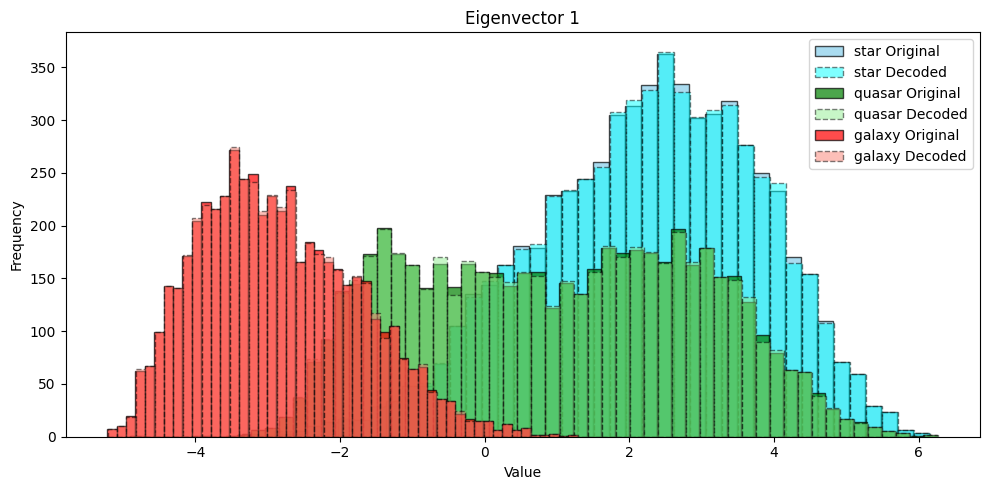

In [57]:
import matplotlib.pyplot as plt

# First, plot for Eigenvector 1 to assess its distinctiveness across classes
fig, ax = plt.subplots(figsize=(10, 5))  # Single plot for eigenvector 1
eigenvector_index = 0  # Index for the first eigenvector

# Loop over each class for eigenvector 1
for j, class_name in enumerate(class_names):
    # Extract original and decoded data for the first eigenvector for current class
    original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
    decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
    
    # Plot original data for eigenvector 1
    ax.hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
    
    # Plot decoded data for eigenvector 1
    ax.hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

# Set title and labels, and add a legend for eigenvector 1
ax.set_title(f'Eigenvector {eigenvector_index+1}')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot for eigenvector 1
plt.tight_layout()
plt.show()

Next, we will examine selected eigenvectors (2, 5, 8, and 9) where one class is expected to separate well from the others. Following this, we will look at the remaining eigenvectors to analyze class overlap.

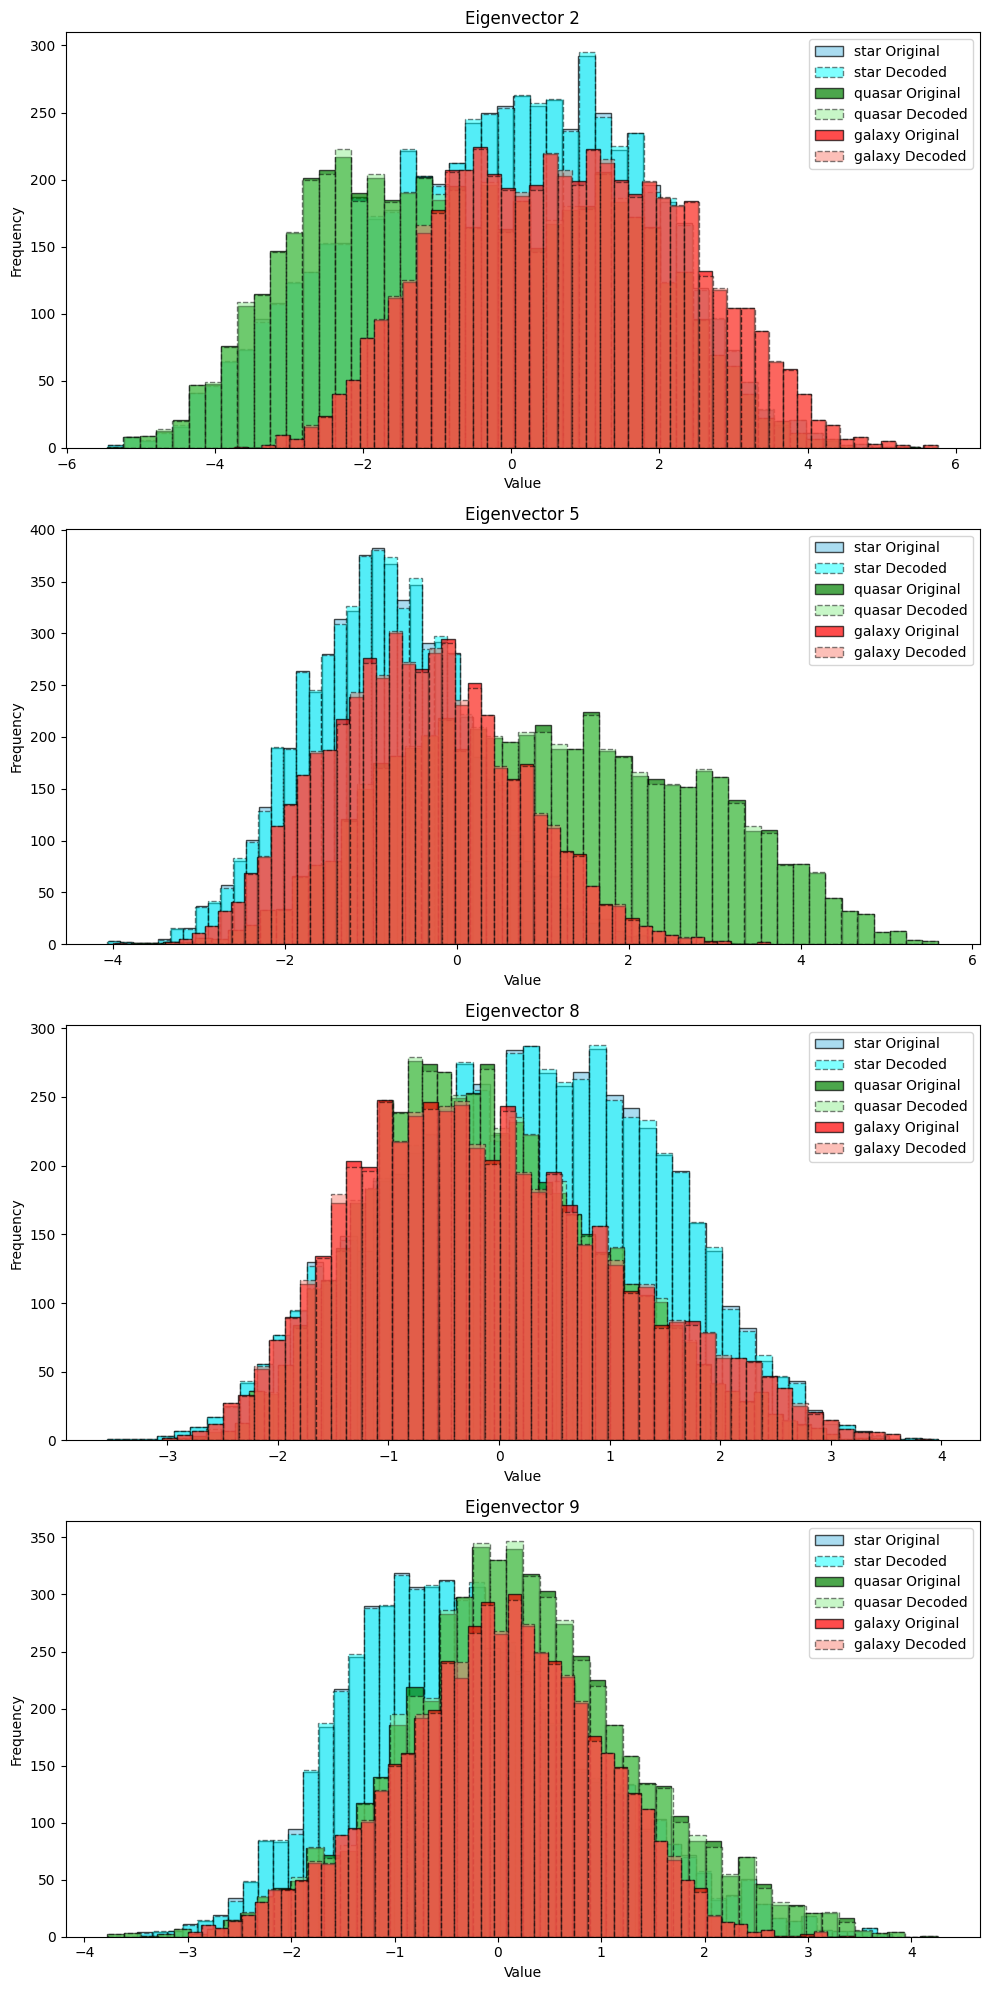

In [58]:
# Plot for selected eigenvectors with potentially good class separation
well_separated_eigenvectors = [1, 4, 7, 8]  # considering 0-indexing, these correspond to eigenvectors 2, 5, 8, and 9
fig, axes = plt.subplots(len(well_separated_eigenvectors), 1, figsize=(10, 5 * len(well_separated_eigenvectors)))

# Loop over each selected eigenvector
for idx, eigenvector_index in enumerate(well_separated_eigenvectors):
    for j, class_name in enumerate(class_names):
        # Extract original and decoded data for current eigenvector and class
        original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
        decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]

        # Plot original data
        axes[idx].hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
        
        # Plot decoded data
        axes[idx].hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

    # Set title and labels, and add a legend for each eigenvector
    axes[idx].set_title(f'Eigenvector {eigenvector_index+1}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Show the plot for selected eigenvectors
plt.tight_layout()
plt.show()

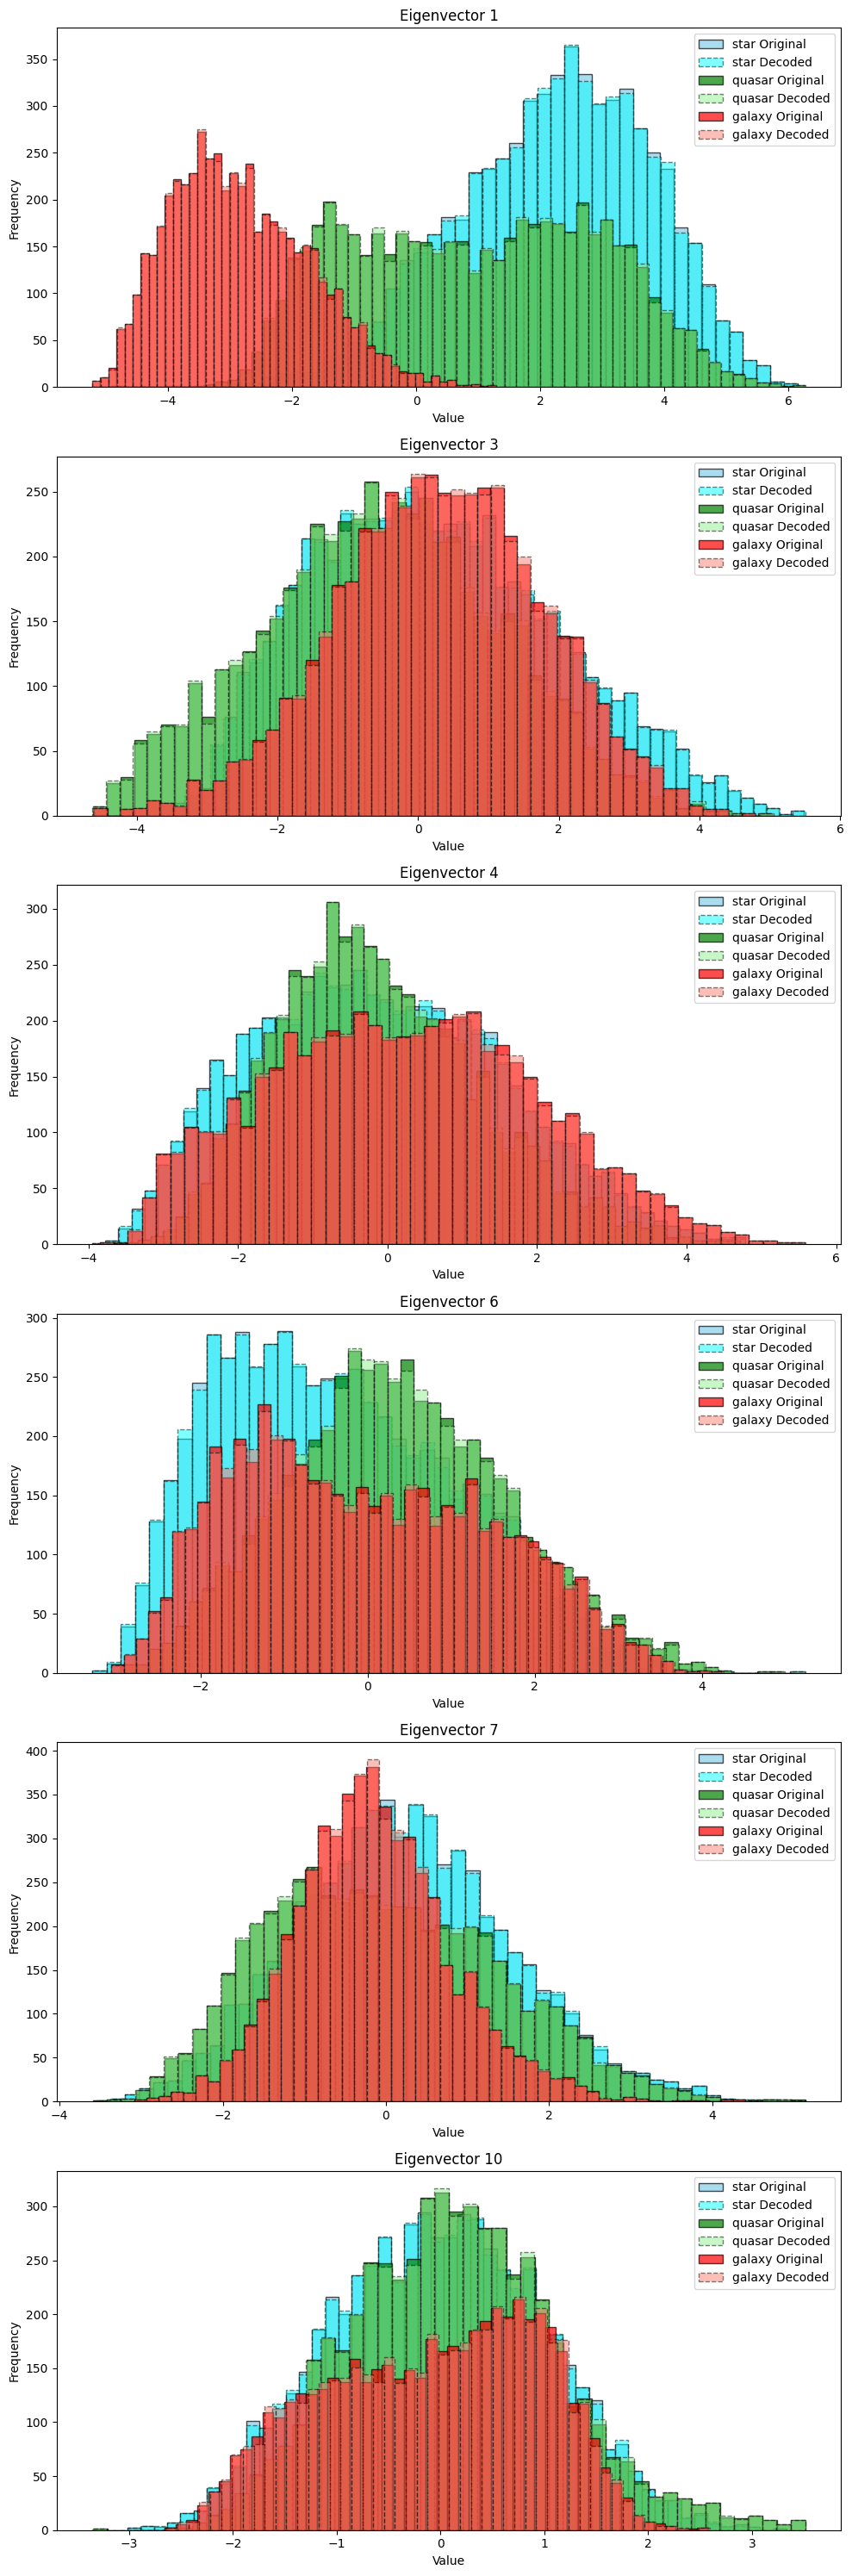

In [59]:
# Plot for the remaining eigenvectors with less class separation
other_eigenvectors = [i for i in range(10) if i not in well_separated_eigenvectors]
fig, axes = plt.subplots(len(other_eigenvectors), 1, figsize=(10, 5 * len(other_eigenvectors)))

for idx, eigenvector_index in enumerate(other_eigenvectors):
    for j, class_name in enumerate(class_names):
        original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
        decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]

        axes[idx].hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
        axes[idx].hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

    axes[idx].set_title(f'Eigenvector {eigenvector_index+1}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

We have explored the reconstruction quality of the autoencoder using PCA-reduced data across different principal components. This approach provided insight into the distinctiveness and overlap of classes within a reduced feature space, which is valuable for understanding the potential performance of classification models trained on this data.

## III. AGN DC Experiment <a class="anchor" id="four"></a>

### We Now Begin Exploring the AGN DC:

### Importing Modules

It is widely recommended to include the import statements for all the necessary modules at the beginning of a Jupyter Notebook or any Python program. 
This practice ensures that the required dependencies are properly imported and accessible at the required points in the code, thus avoiding any potential issues or errors related to missing modules or dependencies.

In [1]:
# Importing all required modules

# System modules allow Python programs to interact with the operating system and perform tasks 
# such as reading and writing files, managing processes, and accessing environment variables 
import os
import sys
import importlib
import pickle
import argparse
import itertools
import csv
from tqdm import tqdm
import time

# Data manipulation modules allow users to perform various operations on data,
# such as cleaning, transforming, aggregating, filtering, and visualizing data
import math
import numpy as np
import pandas as pd

# Visualization modules allow users to create visual representations of data
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
# pd.set_option('display.max_columns', 1000)

# Embedding Images within the framework
from IPython.display import HTML
import base64
def get_image_base64(path):
    with open(path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path1 = 'neural_networks.png'
image_base64_1 = get_image_base64(image_path1)

image_path2 = 'autoencoder.png'
image_base64_2 = get_image_base64(image_path2)

# Scikit-learn provides a range of supervised and unsupervised learning algorithms,
# as well as tools for model selection and data preprocessing
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, normalized_mutual_info_score, adjusted_rand_score

# Scipy is a Python library for scientific computing and technical computing
from scipy import stats
from scipy.optimize import linear_sum_assignment as linear_assignment

# Astropy is a Python library for astronomy and astrophysics
from astropy.io import fits
from astropy.table import Table

# TensorFlow is an open-source machine learning library that provides an extensive set of tools and libraries
# for building,training, and deploying neural networks, as well as other machine learning algorithms
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, regularizers, callbacks

# PyTorch is an open-source machine learning library for Python that provides a range of tools
# and functions for building and training neural networks and other machine learning models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,TensorDataset
from torch.autograd import Variable

print(sys.version)

3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:48:25) 
[Clang 14.0.6 ]


## IIIa. Data Acquisition <a class="anchor" id="five"></a>

Data acquisition involves the collection and aggregation of data from diverse sources. This crucial initial stage in the data analysis pipeline entails recognizing data sources and acquiring the data in a format suitable for further analysis.

The provided statement establishes the data pathway. If an alternative data source is required, the line in the subsequent cell should be substituted accordingly.

In [2]:
# Defining a variable named 'data_dir' and assigning it the string value /Users/ash/Research/Data/AGN_DataChallenge/ 
# This is the path to the directory where the dataset is stored on the local machine
data_dir = '/Users/ash/Research/Data/AGN_DataChallenge/ObjectTable.parquet'

# Using the display() function to display the value of the 'data_dir' variable in the output of the Jupyter Notebook
display(data_dir)

'/Users/ash/Research/Data/AGN_DataChallenge/ObjectTable.parquet'

#### Data types

The measurements can be classified into several key categories:
- __Astrometry__ includes measurements of celestial coordinates such as right ascension (RA), declination (Dec), proper motion, and parallax.
- __Photometry__ encompasses both point and extended source photometry, providing measurements in terms of AB magnitudes and fluxes (expressed in nJy).
- __Color__ is determined by computing the ratios of fluxes in different wavelength bands.
- __Morphology__ is indicated by a binary value, with 1 representing extended sources and 0 representing point-like sources.
- __Light Curve Features__ are extracted from the SDSS light curves when a match is found.
- __Redshift__ is provided whenever available, including both spectroscopic and photometric measurements.

Inspecting the attributes

In [3]:
object_df = pd.read_parquet(data_dir)
display(object_df.describe())
display(object_df.shape)

# Number of objects in each class + unlabeled
display(object_df['class'].value_counts())
display("Number of unlabeled objects: {}".format(object_df['class'].isna().sum()))

ra            dec       psPm_ra      psPm_dec  \
count  446487.000000  446487.000000  4.409540e+05  4.409540e+05   
mean      113.444616      -0.366125 -1.573980e+02  3.466920e+02   
std       142.250504       2.913140  2.668886e+05  2.288902e+05   
min         0.000281     -63.348846 -1.549250e+08 -4.577680e+07   
25%        16.222099      -1.734935 -2.651840e+00 -4.435840e+00   
50%        33.608160      -0.174219  1.751340e-01 -4.706605e-01   
75%       320.663727       1.096750  4.129985e+00  2.756258e+00   
max       359.999343      71.652336  7.469720e+07  8.200310e+07   

          psParallax      psFlux_u      psFlux_g      psFlux_r      psFlux_i  \
count  134086.000000  3.837000e+05  4.327770e+05  4.349760e+05  4.344730e+05   
mean        0.632487  2.088371e+04  6.637403e+04  1.204108e+05  1.441588e+05   
std         1.271928  8.627008e+04  2.603277e+05  5.643356e+06  4.128693e+05   
min       -17.428825 -3.010739e+05 -1.205824e+05 -3.882952e+04 -1.929064e+03   
25%         0.042136  8.334138e+02  2.117627e+03  4.649031e+03  8.016084e+03   
50%         0.396610  2.269940e+03  4.816601e+03  1.285625e+04  2.199475e+04   
75%         0.960485  1.026092e+04  2.554773e+04  4.949970e+04  7.176169e+04   
max        30.256895  6.037682e+06  1.028422e+07  3.714715e+09  2.010603e+07   

           psFlux_z  ...  lcNonPeriodic[27]_g  lcNonPeriodic[27]_r  \
count  4.353380e+05  ...         2.086340e+05         2.086260e+05   
mean   1.825155e+05  ...         1.630352e-01         1.500006e-01   
std    5.371203e+05  ...         4.120180e-01         3.391911e-01   
min   -8.334768e+03  ...         5.854756e-08         5.854756e-08   
25%    1.033239e+04  ...         1.404330e-02         1.267155e-02   
50%    2.979533e+04  ...         3.322668e-02         3.410033e-02   
75%    8.989345e+04  ...         1.167255e-01         1.274892e-01   
max    3.361230e+07  ...         1.436499e+01         1.080583e+01   

       lcNonPeriodic[27]_i  lcNonPeriodic[27]_z  lcNonPeriodic[28]_u  \
count         2.086260e+05         2.086360e+05        208647.000000   
mean          1.544376e-01         1.564321e-01          1074.567277   
std           3.449507e-01         4.031540e-01          4250.521486   
min           5.854756e-08         5.854756e-08             0.018316   
25%           1.132901e-02         1.049035e-02             1.550629   
50%           3.464072e-02         3.124982e-02            10.204748   
75%           1.333405e-01         1.097157e-01           145.721905   
max           3.405070e+01         1.393099e+01         22026.465795   

       lcNonPeriodic[28]_g  lcNonPeriodic[28]_r  lcNonPeriodic[28]_i  \
count        208634.000000        208626.000000        208626.000000   
mean            336.663047           252.196483           213.479630   
std            2162.567758          1587.289403          1351.681347   
min               0.018316             0.018316             0.018316   
25%               0.832346             0.515604             0.589236   
50%               5.822918             3.574042             3.669372   
75%              78.707282            60.275080            41.841657   
max           22026.465795         22026.465795         22026.465795   

       lcNonPeriodic[28]_z            ebv  
count        208636.000000  446487.000000  
mean            673.852825       0.042991  
std            3356.310106       0.024886  
min               0.018316       0.005440  
25%               1.262626       0.026742  
50%               6.927093       0.034057  
75%              56.328877       0.050708  
max           22026.465795       1.285118  

[8 rows x 383 columns]

(446487, 384)

Gal         246225
Star         96715
Qso          83130
Agn           5608
highZQso      1089
Name: class, dtype: int64

'Number of unlabeled objects: 13720'

Stripe 82 is a region of the sky that has been observed multiple times by the Sloan Digital Sky Survey (SDSS). It is located along the celestial equator and covers about 300 square degrees. Because Stripe 82 has been observed so many times, it has very deep imaging, which means it can detect fainter objects than a typical SDSS image.

XMM-LSS stands for XMM-Large Scale Structure. It's an X-ray survey of the sky conducted by the XMM-Newton space telescope. It covers a region of about 11.1 square degrees and is designed to study large-scale cosmic structures like galaxy clusters and cosmic filaments.

The merging of these datasets likely aims to provide a more comprehensive view of the studied celestial objects, combining data from both optical (Stripe 82) and X-ray (XMM-LSS) observations.

#### Data Munging

#### Transforming Class Labels to Numerical Values

For computational efficiency and to facilitate the use of algorithms that require numerical input, we convert the original class labels into numerical values. We assign:

- `0` to `Star`
- `1` to `Gal`
- `2` to `Qso`, `Agn`, and `highZQso`

This transformation also merges `Agn` and `highZQso` into the `Qso` class. This is done to simplify our classification problem into three distinct categories, which are now represented by the numbers 0, 1, and 2, respectively. The following code cell executes this transformation and provides a summary of the distribution of the transformed class labels.


In [4]:
# Replace original class labels with numerical values for easier processing
# 'Star' is assigned 0, 'Gal' is assigned 1, and 'Qso', 'Agn', 'highZQso' are assigned 2
# Effectively, 'Agn' and 'highZQso' are merged into 'Qso' class

object_df_new = object_df.replace({'class': {'Star': 0, 'Gal': 1, 'Qso': 2, 'Agn': 2, 'highZQso': 2}})

# Display the shape of 'class' column in the new dataframe to see total instances
# The shape will give us the total number of instances including labeled and unlabeled ones.
display(object_df_new['class'].shape)

# Count and display number of instances for each class (0, 1, 2)
# This will help us understand the distribution of our labeled instances.
display(object_df_new['class'].value_counts())

# Calculate and display the number of instances in 'class' column with no label (NaN values)
# This confirms the total number of unlabeled objects which may need further handling.
display("Number of unlabeled objects: {}".format(object_df_new['class'].isna().sum()))

(446487,)

1.0    246225
0.0     96715
2.0     89827
Name: class, dtype: int64

'Number of unlabeled objects: 13720'

## IIIb. Exploratory Data Analysis <a class="anchor" id="six"></a>

Our goal is to be able to distinguish one type of astronomical source from another. Specifically, AGNs and quasars from stars (of various temperatures), normal (inactive) galaxies, exploding stars, etc. These different objects emit different amounts of light at the different wavelengths.

The attribute list encompasses measurements of parallax, proper motion, fluxes, magnitudes, and error estimates in various bands (u, g, r, i, z, y), along with additional features like extendedness, standard colors, class labels, photometric redshifts, flags, spectroscopic identifiers, and light curve features. This list is intended for in-depth analyses where all available information is required to understand and classify these objects.

In [5]:
attr_list = [
    # Point source parallax and proper motion
    'psParallax', 'psPm_ra', 'psPm_dec',

    # Point source flux in different bands
    'psFlux_u', 'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y',

    # Point source flux errors in different bands
    'psFluxErr_u', 'psFluxErr_g', 'psFluxErr_r', 'psFluxErr_i', 'psFluxErr_z', 'psFluxErr_y',

    # Bright disk flux in different bands
    'bdFlux_u', 'bdFlux_g', 'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y',

    # Bright disk flux errors in different bands
    'bdFluxErr_u', 'bdFluxErr_g', 'bdFluxErr_r', 'bdFluxErr_i', 'bdFluxErr_z', 'bdFluxErr_y',

    # Point source magnitude in different bands
    'psMag_u', 'psMag_g', 'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y',

    # Point source magnitude errors in different bands
    'psMagErr_u', 'psMagErr_g', 'psMagErr_r', 'psMagErr_i', 'psMagErr_z', 'psMagErr_y',

    # Bright disk magnitude in different bands
    'bdMag_u', 'bdMag_g', 'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y',

    # Bright disk magnitude errors in different bands
    'bdMagErr_u', 'bdMagErr_g', 'bdMagErr_r', 'bdMagErr_i', 'bdMagErr_z', 'bdMagErr_y',

    # Extendedness in different bands
    'extendedness_u', 'extendedness_g', 'extendedness_r', 'extendedness_i', 'extendedness_z', 'extendedness_y',

    # Standard colors and their errors
    'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3', 'stdColor_4', 
    'stdColorErr_0', 'stdColorErr_1', 'stdColorErr_2', 'stdColorErr_3', 'stdColorErr_4',

    # Class, estimated photometric redshift, true redshift, and flags in different bands
    'class', 'photoZ_pest', 'z','ebv', 'flags_u', 'flags_g', 'flags_r', 'flags_i', 'flags_z', 'flags_y',

    # Spectroscopic identifiers
    'spec_fiberid', 'spec_plate', 'spec_mjd',

    # Light curve periodic features in different bands for different periodic indices
    'lcPeriodic[0]_g',
    'lcPeriodic[0]_r', 'lcPeriodic[0]_i', 'lcPeriodic[1]_g', 'lcPeriodic[1]_r', 'lcPeriodic[1]_i', 
    'lcPeriodic[2]_g','lcPeriodic[2]_r', 'lcPeriodic[2]_i', 'lcPeriodic[3]_g', 'lcPeriodic[3]_r', 
    'lcPeriodic[3]_i', 'lcPeriodic[4]_u','lcPeriodic[4]_g', 'lcPeriodic[4]_r', 'lcPeriodic[4]_i', 
    'lcPeriodic[4]_z', 'lcPeriodic[5]_u', 'lcPeriodic[5]_g','lcPeriodic[5]_r', 'lcPeriodic[5]_i', 
    'lcPeriodic[5]_z', 'lcPeriodic[6]_u', 'lcPeriodic[6]_g', 'lcPeriodic[6]_r','lcPeriodic[6]_i', 
    'lcPeriodic[6]_z', 'lcPeriodic[7]_u', 'lcPeriodic[7]_g', 'lcPeriodic[7]_r', 'lcPeriodic[7]_i',
    'lcPeriodic[7]_z', 'lcPeriodic[8]_u', 'lcPeriodic[8]_g', 'lcPeriodic[8]_r', 'lcPeriodic[8]_i',
    'lcPeriodic[8]_z','lcPeriodic[9]_u', 'lcPeriodic[9]_g', 'lcPeriodic[9]_r', 'lcPeriodic[9]_i', 
    'lcPeriodic[9]_z', 'lcPeriodic[10]_u','lcPeriodic[10]_g', 'lcPeriodic[10]_r', 'lcPeriodic[10]_i', 
    'lcPeriodic[10]_z', 'lcPeriodic[11]_u',  'lcPeriodic[11]_g', 'lcPeriodic[11]_r', 'lcPeriodic[11]_i', 
    'lcPeriodic[11]_z', 'lcPeriodic[12]_u', 'lcPeriodic[12]_g', 'lcPeriodic[12]_r', 'lcPeriodic[12]_i', 
    'lcPeriodic[12]_z', 'lcPeriodic[13]_u',  'lcPeriodic[13]_g', 'lcPeriodic[13]_r', 'lcPeriodic[13]_i', 
    'lcPeriodic[13]_z', 'lcPeriodic[14]_u', 'lcPeriodic[14]_g', 'lcPeriodic[14]_r', 'lcPeriodic[14]_i', 
    'lcPeriodic[14]_z', 'lcPeriodic[15]_u', 'lcPeriodic[15]_g', 'lcPeriodic[15]_r', 'lcPeriodic[15]_i', 
    'lcPeriodic[15]_z', 'lcPeriodic[16]_u',  'lcPeriodic[16]_g', 'lcPeriodic[16]_r', 'lcPeriodic[16]_i', 
    'lcPeriodic[16]_z', 'lcPeriodic[17]_u','lcPeriodic[17]_g', 'lcPeriodic[17]_r', 'lcPeriodic[17]_i', 
    'lcPeriodic[17]_z', 'lcPeriodic[18]_u','lcPeriodic[18]_g', 'lcPeriodic[18]_r', 'lcPeriodic[18]_i', 
    'lcPeriodic[18]_z', 'lcPeriodic[19]_u','lcPeriodic[19]_g', 'lcPeriodic[19]_r', 'lcPeriodic[19]_i', 
    'lcPeriodic[19]_z', 'lcPeriodic[20]_u','lcPeriodic[20]_g', 'lcPeriodic[20]_r', 'lcPeriodic[20]_i', 
    'lcPeriodic[20]_z', 'lcPeriodic[21]_u', 'lcPeriodic[21]_g', 'lcPeriodic[21]_r', 'lcPeriodic[21]_i', 
    'lcPeriodic[21]_z', 'lcPeriodic[22]_u', 'lcPeriodic[22]_g', 'lcPeriodic[22]_r', 'lcPeriodic[22]_i', 
    'lcPeriodic[22]_z', 'lcPeriodic[23]_u', 'lcPeriodic[23]_g', 'lcPeriodic[23]_r', 'lcPeriodic[23]_i', 
    'lcPeriodic[23]_z', 'lcPeriodic[24]_u', 'lcPeriodic[24]_g', 'lcPeriodic[24]_r', 'lcPeriodic[24]_i', 
    'lcPeriodic[24]_z', 'lcPeriodic[25]_u',  'lcPeriodic[25]_g', 'lcPeriodic[25]_r', 'lcPeriodic[25]_i',
    'lcPeriodic[25]_z', 'lcPeriodic[26]_u',  'lcPeriodic[26]_g', 'lcPeriodic[26]_r', 'lcPeriodic[26]_i', 
    'lcPeriodic[26]_z', 'lcPeriodic[27]_u',  'lcPeriodic[27]_g', 'lcPeriodic[27]_r', 'lcPeriodic[27]_i',
    'lcPeriodic[27]_z', 'lcPeriodic[28]_u', 'lcPeriodic[28]_g', 'lcPeriodic[28]_r', 'lcPeriodic[28]_i', 
    'lcPeriodic[28]_z', 'lcPeriodic[29]_u', 'lcPeriodic[29]_g', 'lcPeriodic[29]_r', 'lcPeriodic[29]_i', 
    'lcPeriodic[29]_z', 'lcPeriodic[30]_u', 'lcPeriodic[30]_g', 'lcPeriodic[30]_r', 'lcPeriodic[30]_i', 
    'lcPeriodic[30]_z', 'lcPeriodic[31]_u',  'lcPeriodic[31]_g', 'lcPeriodic[31]_r', 'lcPeriodic[31]_i',
    'lcPeriodic[31]_z', 'lcPeriodic[32]_u', 'lcPeriodic[32]_g', 'lcPeriodic[32]_r', 'lcPeriodic[32]_i',
    'lcPeriodic[32]_z',

    # Light curve non-periodic features in different bands for different non-periodic indices
    'lcNonPeriodic[0]_u',
    'lcNonPeriodic[0]_g', 'lcNonPeriodic[0]_r', 'lcNonPeriodic[0]_i', 'lcNonPeriodic[0]_z', 'lcNonPeriodic[1]_u',
    'lcNonPeriodic[1]_g', 'lcNonPeriodic[1]_r', 'lcNonPeriodic[1]_i', 'lcNonPeriodic[1]_z', 'lcNonPeriodic[2]_u',
    'lcNonPeriodic[2]_g', 'lcNonPeriodic[2]_r', 'lcNonPeriodic[2]_i', 'lcNonPeriodic[2]_z', 'lcNonPeriodic[3]_u',
    'lcNonPeriodic[3]_g', 'lcNonPeriodic[3]_r', 'lcNonPeriodic[3]_i', 'lcNonPeriodic[3]_z', 'lcNonPeriodic[4]_u',
    'lcNonPeriodic[4]_g', 'lcNonPeriodic[4]_r', 'lcNonPeriodic[4]_i', 'lcNonPeriodic[4]_z', 'lcNonPeriodic[5]_u',
    'lcNonPeriodic[5]_g', 'lcNonPeriodic[5]_r', 'lcNonPeriodic[5]_i', 'lcNonPeriodic[5]_z', 'lcNonPeriodic[6]_u',
    'lcNonPeriodic[6]_g', 'lcNonPeriodic[6]_r', 'lcNonPeriodic[6]_i', 'lcNonPeriodic[6]_z', 'lcNonPeriodic[7]_u', 
    'lcNonPeriodic[7]_g', 'lcNonPeriodic[7]_r', 'lcNonPeriodic[7]_i', 'lcNonPeriodic[7]_z', 'lcNonPeriodic[8]_u',
    'lcNonPeriodic[8]_g', 'lcNonPeriodic[8]_r', 'lcNonPeriodic[8]_i', 'lcNonPeriodic[8]_z', 'lcNonPeriodic[9]_u',
    'lcNonPeriodic[9]_g', 'lcNonPeriodic[9]_r', 'lcNonPeriodic[9]_i', 'lcNonPeriodic[9]_z', 'lcNonPeriodic[10]_u',
    'lcNonPeriodic[10]_g', 'lcNonPeriodic[10]_r', 'lcNonPeriodic[10]_i', 'lcNonPeriodic[10]_z',
    'lcNonPeriodic[11]_u', 'lcNonPeriodic[11]_g', 'lcNonPeriodic[11]_r', 'lcNonPeriodic[11]_i',
    'lcNonPeriodic[11]_z', 'lcNonPeriodic[12]_u', 'lcNonPeriodic[12]_g', 'lcNonPeriodic[12]_r', 
    'lcNonPeriodic[12]_i', 'lcNonPeriodic[12]_z', 'lcNonPeriodic[13]_u', 'lcNonPeriodic[13]_g',
    'lcNonPeriodic[13]_r', 'lcNonPeriodic[13]_i', 'lcNonPeriodic[13]_z', 'lcNonPeriodic[14]_u', 
    'lcNonPeriodic[14]_g', 'lcNonPeriodic[14]_r', 'lcNonPeriodic[14]_i', 'lcNonPeriodic[14]_z', 
    'lcNonPeriodic[15]_u', 'lcNonPeriodic[15]_g', 'lcNonPeriodic[15]_r', 'lcNonPeriodic[15]_i', 
    'lcNonPeriodic[15]_z', 'lcNonPeriodic[16]_u', 'lcNonPeriodic[16]_g', 'lcNonPeriodic[16]_r', 
    'lcNonPeriodic[16]_i', 'lcNonPeriodic[16]_z', 'lcNonPeriodic[17]_u', 'lcNonPeriodic[17]_g', 
    'lcNonPeriodic[17]_r', 'lcNonPeriodic[17]_i', 'lcNonPeriodic[17]_z', 'lcNonPeriodic[18]_u',
    'lcNonPeriodic[18]_g', 'lcNonPeriodic[18]_r', 'lcNonPeriodic[18]_i', 'lcNonPeriodic[18]_z',
    'lcNonPeriodic[19]_u', 'lcNonPeriodic[19]_g', 'lcNonPeriodic[19]_r', 'lcNonPeriodic[19]_i', 
    'lcNonPeriodic[19]_z', 'lcNonPeriodic[20]_u', 'lcNonPeriodic[20]_g', 'lcNonPeriodic[20]_r', 
    'lcNonPeriodic[20]_i', 'lcNonPeriodic[20]_z', 'lcNonPeriodic[21]_u', 'lcNonPeriodic[21]_g',
    'lcNonPeriodic[21]_r', 'lcNonPeriodic[21]_i', 'lcNonPeriodic[21]_z', 'lcNonPeriodic[22]_u', 
    'lcNonPeriodic[22]_g', 'lcNonPeriodic[22]_r', 'lcNonPeriodic[22]_i', 'lcNonPeriodic[22]_z', 
    'lcNonPeriodic[23]_u', 'lcNonPeriodic[23]_g', 'lcNonPeriodic[23]_r', 'lcNonPeriodic[23]_i', 
    'lcNonPeriodic[23]_z', 'lcNonPeriodic[24]_u', 'lcNonPeriodic[24]_g', 'lcNonPeriodic[24]_r',
    'lcNonPeriodic[24]_i', 'lcNonPeriodic[24]_z', 'lcNonPeriodic[25]_u', 'lcNonPeriodic[25]_g', 
    'lcNonPeriodic[25]_r', 'lcNonPeriodic[25]_i', 'lcNonPeriodic[25]_z', 'lcNonPeriodic[26]_u',
    'lcNonPeriodic[26]_g', 'lcNonPeriodic[26]_r', 'lcNonPeriodic[26]_i', 'lcNonPeriodic[26]_z', 
    'lcNonPeriodic[27]_u', 'lcNonPeriodic[27]_g', 'lcNonPeriodic[27]_r', 'lcNonPeriodic[27]_i', 
    'lcNonPeriodic[27]_z', 'lcNonPeriodic[28]_u', 'lcNonPeriodic[28]_g', 'lcNonPeriodic[28]_r',
    'lcNonPeriodic[28]_i','lcNonPeriodic[28]_z'
            ]

This list includes similar attributes as attr_list but omits the error estimates for flux and magnitude in different bands. The exclusion of error estimates can simplify the analysis and focus on the primary measurements themselves. This list is beneficial for exploratory data analyses where the primary focus is on the central tendencies and distributions of the measurements rather than their precision or variability.

In [6]:
attr_noerror = [
    # Point source parallax and proper motion
    'psParallax', 'psPm_ra', 'psPm_dec',

    # Point source flux in different bands
    'psFlux_u', 'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y',

    # Bright disk flux in different bands
    'bdFlux_u', 'bdFlux_g', 'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y',

    # Point source magnitude in different bands
    'psMag_u', 'psMag_g', 'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y',

    # Bright disk magnitude in different bands
    'bdMag_u', 'bdMag_g', 'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y',

    # Extendedness in different bands
    'extendedness_u', 'extendedness_g', 'extendedness_r', 'extendedness_i', 'extendedness_z', 'extendedness_y',

    # Standard colors
    'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3', 'stdColor_4',

    # Class, estimated photometric redshift, true redshift, and flags in different bands
    'class', 'photoZ_pest', 'z','ebv', 'flags_u', 'flags_g', 'flags_r', 'flags_i', 'flags_z', 'flags_y',

    # Spectroscopic identifiers
    'spec_fiberid', 'spec_plate', 'spec_mjd',

    # Light curve periodic features in different bands for different periodic indices
    'lcPeriodic[0]_g',
    'lcPeriodic[0]_r', 'lcPeriodic[0]_i', 'lcPeriodic[1]_g', 'lcPeriodic[1]_r', 'lcPeriodic[1]_i', 
    'lcPeriodic[2]_g','lcPeriodic[2]_r', 'lcPeriodic[2]_i', 'lcPeriodic[3]_g', 'lcPeriodic[3]_r', 
    'lcPeriodic[3]_i', 'lcPeriodic[4]_u','lcPeriodic[4]_g', 'lcPeriodic[4]_r', 'lcPeriodic[4]_i', 
    'lcPeriodic[4]_z', 'lcPeriodic[5]_u', 'lcPeriodic[5]_g','lcPeriodic[5]_r', 'lcPeriodic[5]_i', 
    'lcPeriodic[5]_z', 'lcPeriodic[6]_u', 'lcPeriodic[6]_g', 'lcPeriodic[6]_r','lcPeriodic[6]_i', 
    'lcPeriodic[6]_z', 'lcPeriodic[7]_u', 'lcPeriodic[7]_g', 'lcPeriodic[7]_r', 'lcPeriodic[7]_i',
    'lcPeriodic[7]_z', 'lcPeriodic[8]_u', 'lcPeriodic[8]_g', 'lcPeriodic[8]_r', 'lcPeriodic[8]_i',
    'lcPeriodic[8]_z','lcPeriodic[9]_u', 'lcPeriodic[9]_g', 'lcPeriodic[9]_r', 'lcPeriodic[9]_i', 
    'lcPeriodic[9]_z', 'lcPeriodic[10]_u','lcPeriodic[10]_g', 'lcPeriodic[10]_r', 'lcPeriodic[10]_i', 
    'lcPeriodic[10]_z', 'lcPeriodic[11]_u',  'lcPeriodic[11]_g', 'lcPeriodic[11]_r', 'lcPeriodic[11]_i', 
    'lcPeriodic[11]_z', 'lcPeriodic[12]_u', 'lcPeriodic[12]_g', 'lcPeriodic[12]_r', 'lcPeriodic[12]_i', 
    'lcPeriodic[12]_z', 'lcPeriodic[13]_u',  'lcPeriodic[13]_g', 'lcPeriodic[13]_r', 'lcPeriodic[13]_i', 
    'lcPeriodic[13]_z', 'lcPeriodic[14]_u', 'lcPeriodic[14]_g', 'lcPeriodic[14]_r', 'lcPeriodic[14]_i', 
    'lcPeriodic[14]_z', 'lcPeriodic[15]_u', 'lcPeriodic[15]_g', 'lcPeriodic[15]_r', 'lcPeriodic[15]_i', 
    'lcPeriodic[15]_z', 'lcPeriodic[16]_u',  'lcPeriodic[16]_g', 'lcPeriodic[16]_r', 'lcPeriodic[16]_i', 
    'lcPeriodic[16]_z', 'lcPeriodic[17]_u','lcPeriodic[17]_g', 'lcPeriodic[17]_r', 'lcPeriodic[17]_i', 
    'lcPeriodic[17]_z', 'lcPeriodic[18]_u','lcPeriodic[18]_g', 'lcPeriodic[18]_r', 'lcPeriodic[18]_i', 
    'lcPeriodic[18]_z', 'lcPeriodic[19]_u','lcPeriodic[19]_g', 'lcPeriodic[19]_r', 'lcPeriodic[19]_i', 
    'lcPeriodic[19]_z', 'lcPeriodic[20]_u','lcPeriodic[20]_g', 'lcPeriodic[20]_r', 'lcPeriodic[20]_i', 
    'lcPeriodic[20]_z', 'lcPeriodic[21]_u', 'lcPeriodic[21]_g', 'lcPeriodic[21]_r', 'lcPeriodic[21]_i', 
    'lcPeriodic[21]_z', 'lcPeriodic[22]_u', 'lcPeriodic[22]_g', 'lcPeriodic[22]_r', 'lcPeriodic[22]_i', 
    'lcPeriodic[22]_z', 'lcPeriodic[23]_u', 'lcPeriodic[23]_g', 'lcPeriodic[23]_r', 'lcPeriodic[23]_i', 
    'lcPeriodic[23]_z', 'lcPeriodic[24]_u', 'lcPeriodic[24]_g', 'lcPeriodic[24]_r', 'lcPeriodic[24]_i', 
    'lcPeriodic[24]_z', 'lcPeriodic[25]_u',  'lcPeriodic[25]_g', 'lcPeriodic[25]_r', 'lcPeriodic[25]_i',
    'lcPeriodic[25]_z', 'lcPeriodic[26]_u',  'lcPeriodic[26]_g', 'lcPeriodic[26]_r', 'lcPeriodic[26]_i', 
    'lcPeriodic[26]_z', 'lcPeriodic[27]_u',  'lcPeriodic[27]_g', 'lcPeriodic[27]_r', 'lcPeriodic[27]_i',
    'lcPeriodic[27]_z', 'lcPeriodic[28]_u', 'lcPeriodic[28]_g', 'lcPeriodic[28]_r', 'lcPeriodic[28]_i', 
    'lcPeriodic[28]_z', 'lcPeriodic[29]_u', 'lcPeriodic[29]_g', 'lcPeriodic[29]_r', 'lcPeriodic[29]_i', 
    'lcPeriodic[29]_z', 'lcPeriodic[30]_u', 'lcPeriodic[30]_g', 'lcPeriodic[30]_r', 'lcPeriodic[30]_i', 
    'lcPeriodic[30]_z', 'lcPeriodic[31]_u',  'lcPeriodic[31]_g', 'lcPeriodic[31]_r', 'lcPeriodic[31]_i',
    'lcPeriodic[31]_z', 'lcPeriodic[32]_u', 'lcPeriodic[32]_g', 'lcPeriodic[32]_r', 'lcPeriodic[32]_i',
    'lcPeriodic[32]_z',

    # Light curve non-periodic features in different bands for different non-periodic indices
    'lcNonPeriodic[0]_u',
    'lcNonPeriodic[0]_g', 'lcNonPeriodic[0]_r', 'lcNonPeriodic[0]_i', 'lcNonPeriodic[0]_z', 'lcNonPeriodic[1]_u',
    'lcNonPeriodic[1]_g', 'lcNonPeriodic[1]_r', 'lcNonPeriodic[1]_i', 'lcNonPeriodic[1]_z', 'lcNonPeriodic[2]_u',
    'lcNonPeriodic[2]_g', 'lcNonPeriodic[2]_r', 'lcNonPeriodic[2]_i', 'lcNonPeriodic[2]_z', 'lcNonPeriodic[3]_u',
    'lcNonPeriodic[3]_g', 'lcNonPeriodic[3]_r', 'lcNonPeriodic[3]_i', 'lcNonPeriodic[3]_z', 'lcNonPeriodic[4]_u',
    'lcNonPeriodic[4]_g', 'lcNonPeriodic[4]_r', 'lcNonPeriodic[4]_i', 'lcNonPeriodic[4]_z', 'lcNonPeriodic[5]_u',
    'lcNonPeriodic[5]_g', 'lcNonPeriodic[5]_r', 'lcNonPeriodic[5]_i', 'lcNonPeriodic[5]_z', 'lcNonPeriodic[6]_u',
    'lcNonPeriodic[6]_g', 'lcNonPeriodic[6]_r', 'lcNonPeriodic[6]_i', 'lcNonPeriodic[6]_z', 'lcNonPeriodic[7]_u', 
    'lcNonPeriodic[7]_g', 'lcNonPeriodic[7]_r', 'lcNonPeriodic[7]_i', 'lcNonPeriodic[7]_z', 'lcNonPeriodic[8]_u',
    'lcNonPeriodic[8]_g', 'lcNonPeriodic[8]_r', 'lcNonPeriodic[8]_i', 'lcNonPeriodic[8]_z', 'lcNonPeriodic[9]_u',
    'lcNonPeriodic[9]_g', 'lcNonPeriodic[9]_r', 'lcNonPeriodic[9]_i', 'lcNonPeriodic[9]_z', 'lcNonPeriodic[10]_u',
    'lcNonPeriodic[10]_g', 'lcNonPeriodic[10]_r', 'lcNonPeriodic[10]_i', 'lcNonPeriodic[10]_z',
    'lcNonPeriodic[11]_u', 'lcNonPeriodic[11]_g', 'lcNonPeriodic[11]_r', 'lcNonPeriodic[11]_i',
    'lcNonPeriodic[11]_z', 'lcNonPeriodic[12]_u', 'lcNonPeriodic[12]_g', 'lcNonPeriodic[12]_r', 
    'lcNonPeriodic[12]_i', 'lcNonPeriodic[12]_z', 'lcNonPeriodic[13]_u', 'lcNonPeriodic[13]_g',
    'lcNonPeriodic[13]_r', 'lcNonPeriodic[13]_i', 'lcNonPeriodic[13]_z', 'lcNonPeriodic[14]_u', 
    'lcNonPeriodic[14]_g', 'lcNonPeriodic[14]_r', 'lcNonPeriodic[14]_i', 'lcNonPeriodic[14]_z', 
    'lcNonPeriodic[15]_u', 'lcNonPeriodic[15]_g', 'lcNonPeriodic[15]_r', 'lcNonPeriodic[15]_i', 
    'lcNonPeriodic[15]_z', 'lcNonPeriodic[16]_u', 'lcNonPeriodic[16]_g', 'lcNonPeriodic[16]_r', 
    'lcNonPeriodic[16]_i', 'lcNonPeriodic[16]_z', 'lcNonPeriodic[17]_u', 'lcNonPeriodic[17]_g', 
    'lcNonPeriodic[17]_r', 'lcNonPeriodic[17]_i', 'lcNonPeriodic[17]_z', 'lcNonPeriodic[18]_u',
    'lcNonPeriodic[18]_g', 'lcNonPeriodic[18]_r', 'lcNonPeriodic[18]_i', 'lcNonPeriodic[18]_z',
    'lcNonPeriodic[19]_u', 'lcNonPeriodic[19]_g', 'lcNonPeriodic[19]_r', 'lcNonPeriodic[19]_i', 
    'lcNonPeriodic[19]_z', 'lcNonPeriodic[20]_u', 'lcNonPeriodic[20]_g', 'lcNonPeriodic[20]_r', 
    'lcNonPeriodic[20]_i', 'lcNonPeriodic[20]_z', 'lcNonPeriodic[21]_u', 'lcNonPeriodic[21]_g',
    'lcNonPeriodic[21]_r', 'lcNonPeriodic[21]_i', 'lcNonPeriodic[21]_z', 'lcNonPeriodic[22]_u', 
    'lcNonPeriodic[22]_g', 'lcNonPeriodic[22]_r', 'lcNonPeriodic[22]_i', 'lcNonPeriodic[22]_z', 
    'lcNonPeriodic[23]_u', 'lcNonPeriodic[23]_g', 'lcNonPeriodic[23]_r', 'lcNonPeriodic[23]_i', 
    'lcNonPeriodic[23]_z', 'lcNonPeriodic[24]_u', 'lcNonPeriodic[24]_g', 'lcNonPeriodic[24]_r',
    'lcNonPeriodic[24]_i', 'lcNonPeriodic[24]_z', 'lcNonPeriodic[25]_u', 'lcNonPeriodic[25]_g', 
    'lcNonPeriodic[25]_r', 'lcNonPeriodic[25]_i', 'lcNonPeriodic[25]_z', 'lcNonPeriodic[26]_u',
    'lcNonPeriodic[26]_g', 'lcNonPeriodic[26]_r', 'lcNonPeriodic[26]_i', 'lcNonPeriodic[26]_z', 
    'lcNonPeriodic[27]_u', 'lcNonPeriodic[27]_g', 'lcNonPeriodic[27]_r', 'lcNonPeriodic[27]_i', 
    'lcNonPeriodic[27]_z', 'lcNonPeriodic[28]_u', 'lcNonPeriodic[28]_g', 'lcNonPeriodic[28]_r',
    'lcNonPeriodic[28]_i','lcNonPeriodic[28]_z'
            ]

This list is a further simplified version that includes parallax, proper motion, fluxes, magnitudes, extendedness, standard colors, class labels, photometric redshifts, flags, and spectroscopic identifiers but excludes all light curve features. This list is particularly useful when the focus of the analysis is on static properties of the objects rather than their time-varying aspects. It is suitable where light curve data is either not available or not relevant to the research question.

In [7]:
attr_nolc = [
    # Point source parallax and proper motion
    'psParallax', 'psPm_ra', 'psPm_dec',

    # Point source flux in different bands
    'psFlux_u', 'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y',

    # Point source flux errors in different bands
    'psFluxErr_u', 'psFluxErr_g', 'psFluxErr_r', 'psFluxErr_i', 'psFluxErr_z', 'psFluxErr_y',

    # Bright disk flux in different bands
    'bdFlux_u', 'bdFlux_g', 'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y',

    # Bright disk flux errors in different bands
    'bdFluxErr_u', 'bdFluxErr_g', 'bdFluxErr_r', 'bdFluxErr_i', 'bdFluxErr_z', 'bdFluxErr_y',

    # Point source magnitude in different bands
    'psMag_u', 'psMag_g', 'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y',

    # Point source magnitude errors in different bands
    'psMagErr_u', 'psMagErr_g', 'psMagErr_r', 'psMagErr_i', 'psMagErr_z', 'psMagErr_y',

    # Bright disk magnitude in different bands
    'bdMag_u', 'bdMag_g', 'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y',

    # Bright disk magnitude errors in different bands
    'bdMagErr_u', 'bdMagErr_g', 'bdMagErr_r', 'bdMagErr_i', 'bdMagErr_z', 'bdMagErr_y',

    # Extendedness in different bands
    'extendedness_u', 'extendedness_g', 'extendedness_r', 'extendedness_i', 'extendedness_z', 'extendedness_y',

    # Standard colors and their errors
    'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3', 'stdColor_4', 
    'stdColorErr_0', 'stdColorErr_1', 'stdColorErr_2', 'stdColorErr_3', 'stdColorErr_4',

    # Class, estimated photometric redshift, true redshift, and flags in different bands
    'class', 'photoZ_pest', 'z','ebv', 'flags_u', 'flags_g', 'flags_r', 'flags_i', 'flags_z', 'flags_y',

    # Spectroscopic identifiers
    'spec_fiberid', 'spec_plate', 'spec_mjd'
]

#### Color-Color Plots

The color-color plots are created before passing data into the autoencoder to provide an exploratory visualization of the data distributions and potential correlations or clusters. These plots can also help identify any noticeable patterns, anomalies, or trends in the data across different categories (Star, Galaxy, Quasar), which could influence how the autoencoder learns to represent the data.

Define separate data frames for the stars, galaxies, and quasars (and unlabeled objects).

In [8]:
short_list = ['psMag_i', 'psPm_ra', 'psPm_dec',\
                'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3',\
                'lcNonPeriodic[15]_i', 'lcNonPeriodic[26]_i',\
                'class','z']

In [9]:
# Filter the data for 'Star', 'Gal', and 'Quasar' objects and remove rows with any missing values
object_df_new_Star = object_df_new[short_list].loc[(object_df_new['class'] == 0)].dropna()
object_df_new_Gal = object_df_new[short_list].loc[(object_df_new['class'] == 1)].dropna()
object_df_new_Quasar = object_df_new[short_list].loc[(object_df_new['class'] == 2)].dropna()

In [10]:
# Filter for rows where the 'class' is unlabeled (NaN) and drop the 'class' and 'z' columns
object_df_new_Unlab = object_df_new[short_list][object_df_new['class'].isna()]
object_df_new_Unlab.drop(['class','z'],axis=1,inplace=True)
object_df_new_Unlab.dropna(inplace=True)

In [11]:
# Print out the number of instances in each class-specific dataset and in the unlabeled dataset
print(object_df_new_Star.shape[0])
print(object_df_new_Gal.shape[0])
print(object_df_new_Quasar.shape[0])
print(object_df_new_Unlab.shape[0])

69191
62321
37878
9467


In [12]:
# Define function that will be used to make plot similar to scatter_dot in SM
# Thus contour+dot plot style is necessary given the data volume and also the importance of outliers

def contour_scatter(x, y, exkernel=None, ax=None, color='C0', cmap='Blues_r',
                    lims=None, levels=None, scatter=True, nlevel=1,
                    kwargs_contour={},
                    kwargs_plot={}):
    """ Contour and scatter plot with no points inside contours """


    if ax is None:
        ax = plt.gca()
    # fig, ax = plt.subplots(1)
    if lims is None:
        xmin = x.min()
        xmax = x.max()
        ymin = y.min()
        ymax = y.max()
    else:
        xmin, xmax, ymin, ymax = lims

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    CS = ax.contour(X,
                    Y,
                    Z,
                    cmap=cmap,
                    levels=levels,
                    **kwargs_contour)

    if scatter is True:
        #print(CS.levels)
        threshold = CS.levels[nlevel] # nlevel=1 or 0 depending on Python version?
        z = kernel(values)

        # mask points above density threshold
        x = np.ma.array(x)
        y = np.ma.array(y)
        if exkernel:
            exz = exkernel(values)
            x[exz > threshold] = np.ma.masked
            y[exz > threshold] = np.ma.masked

        x[z > threshold] = np.ma.masked
        y[z > threshold] = np.ma.masked

        ax.scatter(x, y, color=color, **kwargs_plot)

    if exkernel is False:
        return kernel
    
    
#4-class Dark
csdark = palettable.colorbrewer.qualitative.Dark2_4.mpl_colors

0
1
2
3


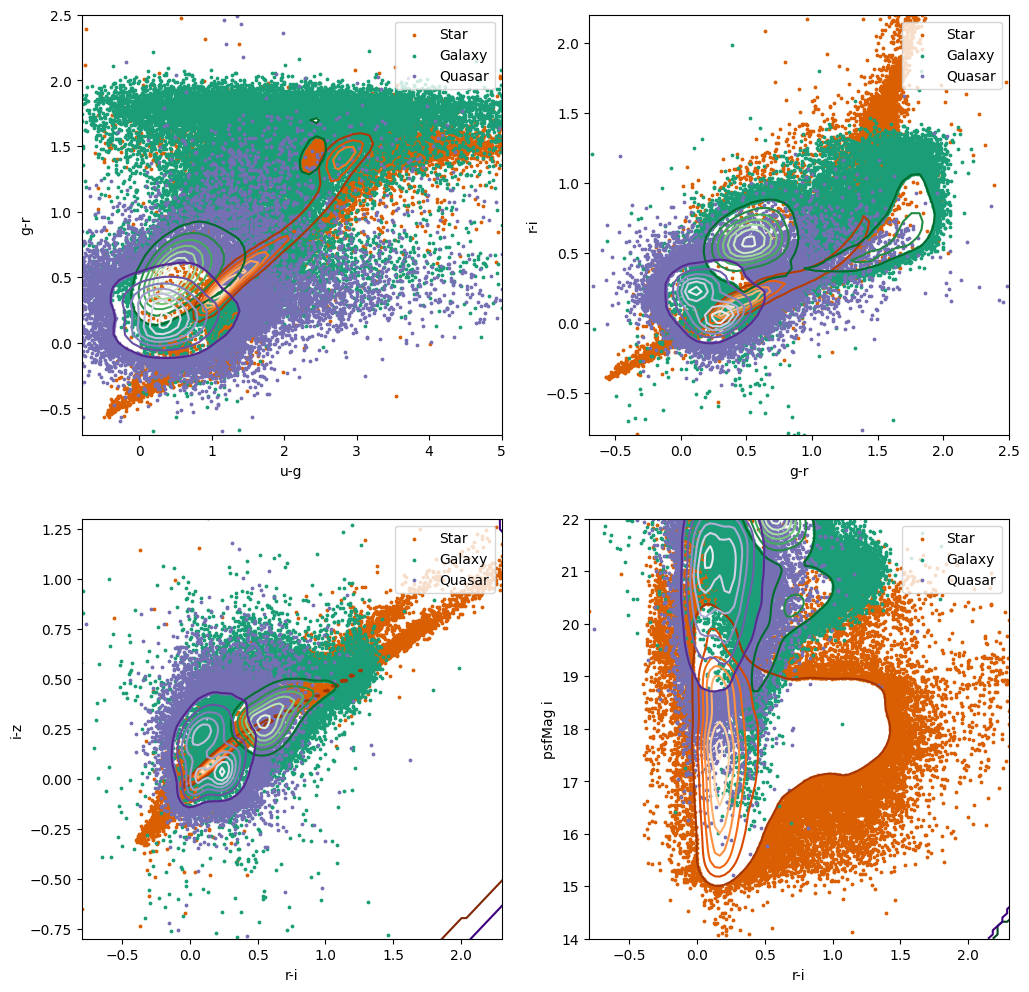

In [13]:
limsugr = np.array([[-2,8], [-2,4]])
limsugr = limsugr.flatten()
limsgri = np.array([[-2,4], [-2,3.5]])
limsgri = limsgri.flatten()
limsriz = np.array([[-1,2.5], [-1,1.5]])
limsriz = limsriz.flatten()
limsriimag = np.array([[-1,2.5], [14,22]])
limsriimag = limsriimag.flatten()
levels = None
nlevel=1

# Make the figure:
#fig,ax = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(2,2,figsize=(12,12))


handles, labels = (0, 0)

    
for i, axis in enumerate(ax.ravel()):
    print(i)

    if i==0: 
        contour_scatter(object_df_new_Star['stdColor_0'], object_df_new_Star['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_0'], object_df_new_Gal['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3, 'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_0'], object_df_new_Quasar['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #Do the unlabeled in another set of plots to avoid confusion
        #contour_scatter(object_df_new_Unlab['stdColor_0'], object_df_new_Unlab['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,5)
        axis.set_ylim(-0.7,2.5)
        axis.set_xlabel('u-g')
        axis.set_ylabel('g-r')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

    if i==1:
        contour_scatter(object_df_new_Star['stdColor_1'], object_df_new_Star['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_1'], object_df_new_Gal['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_1'], object_df_new_Quasar['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_1'], object_df_new_Unlab['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.7,2.5)
        axis.set_ylim(-0.8,2.2)
        axis.set_xlabel('g-r')
        axis.set_ylabel('r-i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==2:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(-0.8,1.3)
        axis.set_xlabel('r-i')
        axis.set_ylabel('i-z')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==3:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3,'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(14,22)
        axis.set_xlabel('r-i')
        axis.set_ylabel('psfMag i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)


## IIIc. Data Processing <a class="anchor" id="seven"></a>

Data processing involves converting unprocessed data into a format that is appropriate for analysis. This encompasses several stages, such as data cleansing, data integration, data transformation, data reduction, and data visualization, with the objective of making the data more usable and insightful.

Our first step is to understand the basic structure of our data. This involves examining the dimensions, column names, and some statistical properties of our dataset. These insights will guide us in deciding which features are crucial for our analysis and which preprocessing steps are necessary.

In [14]:
# Let's take a look at the dimensions, column names, and some statistical properties
# of our dataset to understand what features we have at our disposal
display(object_df_new.shape, object_df_new.columns, object_df_new.describe())

(446487, 384)

Index(['ra', 'dec', 'psPm_ra', 'psPm_dec', 'psParallax', 'psFlux_u',
       'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z',
       ...
       'lcNonPeriodic[27]_g', 'lcNonPeriodic[27]_r', 'lcNonPeriodic[27]_i',
       'lcNonPeriodic[27]_z', 'lcNonPeriodic[28]_u', 'lcNonPeriodic[28]_g',
       'lcNonPeriodic[28]_r', 'lcNonPeriodic[28]_i', 'lcNonPeriodic[28]_z',
       'ebv'],
      dtype='object', length=384)

ra            dec       psPm_ra      psPm_dec  \
count  446487.000000  446487.000000  4.409540e+05  4.409540e+05   
mean      113.444616      -0.366125 -1.573980e+02  3.466920e+02   
std       142.250504       2.913140  2.668886e+05  2.288902e+05   
min         0.000281     -63.348846 -1.549250e+08 -4.577680e+07   
25%        16.222099      -1.734935 -2.651840e+00 -4.435840e+00   
50%        33.608160      -0.174219  1.751340e-01 -4.706605e-01   
75%       320.663727       1.096750  4.129985e+00  2.756258e+00   
max       359.999343      71.652336  7.469720e+07  8.200310e+07   

          psParallax      psFlux_u      psFlux_g      psFlux_r      psFlux_i  \
count  134086.000000  3.837000e+05  4.327770e+05  4.349760e+05  4.344730e+05   
mean        0.632487  2.088371e+04  6.637403e+04  1.204108e+05  1.441588e+05   
std         1.271928  8.627008e+04  2.603277e+05  5.643356e+06  4.128693e+05   
min       -17.428825 -3.010739e+05 -1.205824e+05 -3.882952e+04 -1.929064e+03   
25%         0.042136  8.334138e+02  2.117627e+03  4.649031e+03  8.016084e+03   
50%         0.396610  2.269940e+03  4.816601e+03  1.285625e+04  2.199475e+04   
75%         0.960485  1.026092e+04  2.554773e+04  4.949970e+04  7.176169e+04   
max        30.256895  6.037682e+06  1.028422e+07  3.714715e+09  2.010603e+07   

           psFlux_z  ...  lcNonPeriodic[27]_g  lcNonPeriodic[27]_r  \
count  4.353380e+05  ...         2.086340e+05         2.086260e+05   
mean   1.825155e+05  ...         1.630352e-01         1.500006e-01   
std    5.371203e+05  ...         4.120180e-01         3.391911e-01   
min   -8.334768e+03  ...         5.854756e-08         5.854756e-08   
25%    1.033239e+04  ...         1.404330e-02         1.267155e-02   
50%    2.979533e+04  ...         3.322668e-02         3.410033e-02   
75%    8.989345e+04  ...         1.167255e-01         1.274892e-01   
max    3.361230e+07  ...         1.436499e+01         1.080583e+01   

       lcNonPeriodic[27]_i  lcNonPeriodic[27]_z  lcNonPeriodic[28]_u  \
count         2.086260e+05         2.086360e+05        208647.000000   
mean          1.544376e-01         1.564321e-01          1074.567277   
std           3.449507e-01         4.031540e-01          4250.521486   
min           5.854756e-08         5.854756e-08             0.018316   
25%           1.132901e-02         1.049035e-02             1.550629   
50%           3.464072e-02         3.124982e-02            10.204748   
75%           1.333405e-01         1.097157e-01           145.721905   
max           3.405070e+01         1.393099e+01         22026.465795   

       lcNonPeriodic[28]_g  lcNonPeriodic[28]_r  lcNonPeriodic[28]_i  \
count        208634.000000        208626.000000        208626.000000   
mean            336.663047           252.196483           213.479630   
std            2162.567758          1587.289403          1351.681347   
min               0.018316             0.018316             0.018316   
25%               0.832346             0.515604             0.589236   
50%               5.822918             3.574042             3.669372   
75%              78.707282            60.275080            41.841657   
max           22026.465795         22026.465795         22026.465795   

       lcNonPeriodic[28]_z            ebv  
count        208636.000000  446487.000000  
mean            673.852825       0.042991  
std            3356.310106       0.024886  
min               0.018316       0.005440  
25%               1.262626       0.026742  
50%               6.927093       0.034057  
75%              56.328877       0.050708  
max           22026.465795       1.285118  

[8 rows x 384 columns]

Based on our initial examination, we now focus on a subset of features relevant to photometric analysis. This subset includes various measurements like parallax, magnitudes, fluxes, and light curve features. Selecting the right features is crucial for effective model training and achieving accurate results in classification tasks.

In [15]:
# Define the list of column names we are interested in
photometry_columns = ['psParallax', 'psMag_i', 'psPm_ra', 'psPm_dec',\
                'psFlux_u', 'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y',\
                'psMag_u', 'psMag_g', 'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y',\
                'bdFlux_u', 'bdFlux_g', 'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y',\
                'bdMag_u', 'bdMag_g', 'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y',\
                'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3', 'stdColor_4',\
                'lcNonPeriodic[15]_i', 'lcNonPeriodic[26]_i',\
                'class','z']

# Subset the dataframe to include only these columns
photometry_df = object_df_new[photometry_columns]

# Now display the information for this subsetted dataframe
display(photometry_df.shape, photometry_df.columns, photometry_df.describe())

(446487, 37)

Index(['psParallax', 'psMag_i', 'psPm_ra', 'psPm_dec', 'psFlux_u', 'psFlux_g',
       'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y', 'psMag_u', 'psMag_g',
       'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y', 'bdFlux_u', 'bdFlux_g',
       'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y', 'bdMag_u', 'bdMag_g',
       'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y', 'stdColor_0', 'stdColor_1',
       'stdColor_2', 'stdColor_3', 'stdColor_4', 'lcNonPeriodic[15]_i',
       'lcNonPeriodic[26]_i', 'class', 'z'],
      dtype='object')

psParallax        psMag_i       psPm_ra      psPm_dec      psFlux_u  \
count  134086.000000  434463.000000  4.409540e+05  4.409540e+05  3.837000e+05   
mean        0.632487      20.242307 -1.573980e+02  3.466920e+02  2.088371e+04   
std         1.271928       1.757698  2.668886e+05  2.288902e+05  8.627008e+04   
min       -17.428825      13.141750 -1.549250e+08 -4.577680e+07 -3.010739e+05   
25%         0.042136      19.260313 -2.651840e+00 -4.435840e+00  8.334138e+02   
50%         0.396610      20.544220  1.751340e-01 -4.706605e-01  2.269940e+03   
75%         0.960485      21.639950  4.129985e+00  2.756258e+00  1.026092e+04   
max        30.256895      37.956508  7.469720e+07  8.200310e+07  6.037682e+06   

           psFlux_g      psFlux_r      psFlux_i      psFlux_z      psFlux_y  \
count  4.327770e+05  4.349760e+05  4.344730e+05  4.353380e+05  3.907100e+05   
mean   6.637403e+04  1.204108e+05  1.441588e+05  1.825155e+05  2.152841e+05   
std    2.603277e+05  5.643356e+06  4.128693e+05  5.371203e+05  7.491050e+05   
min   -1.205824e+05 -3.882952e+04 -1.929064e+03 -8.334768e+03  5.908149e-02   
25%    2.117627e+03  4.649031e+03  8.016084e+03  1.033239e+04  1.447897e+04   
50%    4.816601e+03  1.285625e+04  2.199475e+04  2.979533e+04  3.587939e+04   
75%    2.554773e+04  4.949970e+04  7.176169e+04  8.989345e+04  9.866003e+04   
max    1.028422e+07  3.714715e+09  2.010603e+07  3.361230e+07  4.611951e+07   

       ...        bdMag_y     stdColor_0     stdColor_1     stdColor_2  \
count  ...  418980.000000  337876.000000  430081.000000  432797.000000   
mean   ...      19.492297       1.157835       0.866075       0.515209   
std    ...       1.745822       1.102000       0.617246       0.385322   
min    ...      11.371612      -8.053034      -8.919066     -17.962761   
25%    ...      18.462888       0.353872       0.368010       0.210464   
50%    ...      19.634965       0.969953       0.656736       0.509954   
75%    ...      20.886577       1.842330       1.463234       0.726456   
max    ...      31.395554      16.439950      10.679245      11.556881   

          stdColor_3     stdColor_4  lcNonPeriodic[15]_i  lcNonPeriodic[26]_i  \
count  433420.000000  387106.000000        212425.000000        212425.000000   
mean        0.280349       0.153876             0.324449             1.811304   
std         0.218452       0.193704             0.491432             0.532488   
min       -11.200792      -8.771098            -2.260360             0.058823   
25%         0.140964       0.031779             0.039887             1.561094   
50%         0.289096       0.132087             0.188155             1.883047   
75%         0.404575       0.242742             0.425589             2.141249   
max        11.859452       8.088552             4.480168             4.498793   

               class              z  
count  432767.000000  429804.000000  
mean        0.984084       0.714033  
std         0.656348       0.700394  
min         0.000000      -0.009819  
25%         1.000000       0.181653  
50%         1.000000       0.630441  
75%         1.000000       0.890805  
max         2.000000       7.541300  

[8 rows x 37 columns]

In [16]:
# Selecting a valid subset of the data that has labels
photometry_df_label = photometry_df[photometry_df['class'].notna()]

display(photometry_df_label['class'].value_counts())

1.0    246225
0.0     96715
2.0     89827
Name: class, dtype: int64

After selecting the relevant features, our next step is to refine the dataset by focusing only on labeled data. This ensures that our supervised learning models have the necessary information to learn from. We also split the data into features (X) and target labels (y), laying the groundwork for model training and evaluation.

In [17]:
# Set X to the labeled DataFrame
X = photometry_df_label
# Remove the 'class' and redshift column from X as it is the target variable
X = X.drop(['class','z'], axis=1)

# Set y to the 'class' column of the DataFrame
y = photometry_df_label['class']

# Display the shapes and summary statistics 
display(X.shape, y.shape)
display(X.describe())

(432767, 35)

(432767,)

psParallax        psMag_i       psPm_ra      psPm_dec      psFlux_u  \
count  121134.000000  423928.000000  4.273790e+05  4.273790e+05  3.703860e+05   
mean        0.596260      20.298362 -1.625842e+02  3.577910e+02  1.883549e+04   
std         1.229896       1.724385  2.710941e+05  2.324969e+05  7.043362e+04   
min       -17.428825      13.933380 -1.549250e+08 -4.577680e+07 -3.010739e+05   
25%         0.030323      19.370252 -2.672925e+00 -4.269352e+00  7.900080e+02   
50%         0.380019      20.585241  1.675240e-01 -4.030780e-01  2.126271e+03   
75%         0.925883      21.664374  4.109600e+00  2.891965e+00  9.235172e+03   
max        30.256895      37.956508  7.469720e+07  8.200310e+07  6.037682e+06   

           psFlux_g      psFlux_r      psFlux_i      psFlux_z      psFlux_y  \
count  4.213180e+05  4.240880e+05  4.239380e+05  4.247010e+05  3.792270e+05   
mean   5.868788e+04  1.107484e+05  1.317929e+05  1.658032e+05  1.783716e+05   
std    2.153184e+05  5.713096e+06  3.688712e+05  4.625276e+05  5.351534e+05   
min   -1.205824e+05 -3.882952e+04 -1.929064e+03 -8.334768e+03  5.908149e-02   
25%    2.091737e+03  4.546301e+03  7.837870e+03  1.010402e+04  1.415886e+04   
50%    4.433840e+03  1.230028e+04  2.117876e+04  2.869233e+04  3.450330e+04   
75%    2.217808e+04  4.437966e+04  6.484952e+04  8.209189e+04  8.862692e+04   
max    6.933279e+06  3.714715e+09  9.697823e+06  2.328682e+07  3.090374e+07   

       ...        bdMag_i        bdMag_z        bdMag_y     stdColor_0  \
count  ...  427611.000000  427754.000000  405993.000000  326511.000000   
mean   ...      19.835980      19.554255      19.561882       1.135277   
std    ...       1.648992       1.655050       1.698560       1.098138   
min    ...      11.604071      11.439376      11.371612      -8.053034   
25%    ...      18.845239      18.544812      18.567440       0.343620   
50%    ...      20.036497      19.721597      19.704739       0.948741   
75%    ...      21.170924      20.914590      20.913166       1.789859   
max    ...      33.633434      31.358184      31.395554      16.439950   

          stdColor_1     stdColor_2     stdColor_3     stdColor_4  \
count  419489.000000  422565.000000  423174.000000  377272.000000   
mean        0.868125       0.518389       0.282309       0.156573   
std         0.619836       0.383636       0.218456       0.194941   
min        -8.919066     -11.837138     -11.200792      -8.771098   
25%         0.368145       0.214920       0.144661       0.033553   
50%         0.655353       0.514613       0.291801       0.135686   
75%         1.471448       0.728517       0.405808       0.246115   
max        10.679245      11.556881      11.859452       8.088552   

       lcNonPeriodic[15]_i  lcNonPeriodic[26]_i  
count        199385.000000        199385.000000  
mean              0.321424             1.813022  
std               0.482122             0.529873  
min              -1.739772             0.058823  
25%               0.041202             1.561590  
50%               0.187514             1.883442  
75%               0.420639             2.141661  
max               4.480168             4.498793  

[8 rows x 35 columns]

An essential part of model evaluation is testing its performance on unseen data. We split our dataset into a training set, which will be used to train our model, and a testing set, which will be used to evaluate its performance. This split is typically done in an 80-20 ratio, providing a good balance for both training and validation.

Our final preprocessing steps involve ensuring our training and testing sets are free from infinite or NaN values, which can distort the model's performance. We also standardize the features in our dataset. Standardization is a common requirement for many machine learning estimators; it often improves performance and helps the algorithm converge faster.

In [18]:
# Split the dataset into training and testing sets (80% training, 20% testing)
# We chose an 80-20 train-test split as a common starting point that offers a good balance between having 
# enough data for training and enough to validate our model. This is a conventional choice but can be adjusted
# based on model performance and dataset size.

# Applying the split with the standard 80-20 ratio
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state = 1, shuffle=True)

# Conducting these additional splits can provide insight into the robustness of our model. 
# Below, I will add code to perform splits with different proportions and random states.
# Experimenting with different splits and random states to investigate test loss
splits = [(0.40, 0), (0.40, 42), (0.60, 0), (0.60, 42)]  # Different test sizes and random states
split_results = {}

for test_size, random_state in splits:
    X_train_split, X_test_split, y_train_split, y_test_split = model_selection.train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=True
    )
    split_results[(test_size, random_state)] = (X_train_split.shape, X_test_split.shape)

# Display the shapes of all the split datasets
for params, shapes in split_results.items():
    print(f"Test size: {params[0]}, Random state: {params[1]} => Train shape: {shapes[0]}, Test shape: {shapes[1]}")


# Check for infinite values in the training set and replace with NaN
infinite_mask_train = np.isinf(X_train)
if np.any(infinite_mask_train):
    X_train[infinite_mask_train] = np.nan

# Check for infinite values in the test set and replace with NaN
infinite_mask_test = np.isinf(X_test)
if np.any(infinite_mask_test):
    X_test[infinite_mask_test] = np.nan

# Remove rows with NaN values in the training set
nan_mask_train = np.isnan(X_train).any(axis=1)
X_train = X_train[~nan_mask_train]
y_train = y_train[~nan_mask_train]

# Remove rows with NaN values in the test set
nan_mask_test = np.isnan(X_test).any(axis=1)
X_test = X_test[~nan_mask_test]
y_test = y_test[~nan_mask_test]

# We're being diligent in ensuring that our data is clean before we proceed to scale it, as outliers or incorrect values can distort the scaling process.

# Create a StandardScaler object to standardize the features
scaler = preprocessing.StandardScaler()

# Fit the scaler using the training data
scaler.fit(X_train)

# Transform the training data using the fitted scaler
X_train_scaled = scaler.transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and testing data
display(X_train_scaled.shape, X_test_scaled.shape)

Test size: 0.4, Random state: 0 => Train shape: (259660, 35), Test shape: (173107, 35)
Test size: 0.4, Random state: 42 => Train shape: (259660, 35), Test shape: (173107, 35)
Test size: 0.6, Random state: 0 => Train shape: (173106, 35), Test shape: (259661, 35)
Test size: 0.6, Random state: 42 => Train shape: (173106, 35), Test shape: (259661, 35)


(53120, 35)

(13324, 35)

In [19]:
# Check for missing values
print(np.any(np.isnan(X_train_scaled)))
print(np.any(np.isnan(X_test_scaled)))

False
False


## IV. Autoencoder Experiments <a class="anchor" id="eight"></a>

## IVa. Model Definition <a class="anchor" id="nine"></a>

In [20]:
# TensorFlow Implementation

# TensorFlow, paired with Keras, is like a recipe that you plan out in advance. 
# You list all the ingredients (layers of the network) and the steps (operations like activations)
# before you start cooking (running the network). You don't deviate from the recipe once you start. 
# In our case, the recipe consists of an encoder (which reduces the data down to a smaller, dense representation) 
# and a decoder (which tries to reconstruct the original data from this dense representation).

# Here we are setting up the architecture of the simple autoencoder. This setup is static and is defined
# before the training starts. We are using the functional API which allows for direct manipulation of the data flow.

# Define the simple autoencoder function
def Autoencoder_Simple(input_size):
    # Calculate the hidden layer size (half of the input size) 
    #Ash: Defining network dimensions based on input.
    hidden_size = int(input_size / 2.0)
    # Calculate the bottleneck layer size (half of the hidden layer size) 
    # Further reducing dimension for the bottleneck.
    bottleneck_size = int(hidden_size / 2.0)
    
    # Same as PyTorch, setting the hidden layer size to half of the input and the bottleneck size to half of the hidden layer.
    
    # Define the input layer with the specified input size
    input_tab = Input(shape=(input_size,))
    # Define the encoder layers with 'relu' activation function 
    # Structuring the encoder part.
    hidden_1 = layers.Dense(hidden_size, activation='relu')(input_tab)
    bottleneck = layers.Dense(bottleneck_size, activation='relu')(hidden_1)
    # Define the decoder layers 
    # Structuring the decoder part to reconstruct the input.
    hidden_2 = layers.Dense(hidden_size, activation='relu')(bottleneck)
    output_tab = layers.Dense(input_size, activation='linear')(hidden_2)
    
    # Create the encoder model, which includes the input layer and bottleneck layer
    # Defining the encoder model.
    encoder = Model(input_tab, bottleneck) 
    # Create the full autoencoder model, which includes the input and output layers
    # Defining the full autoencoder model.
    autoencoder = Model(input_tab, output_tab) 
    
    # Return both the full autoencoder model and the encoder model
    # Returning both models for potential separate use.
    return autoencoder, encoder 

    # There is no need for a 'forward' function in TensorFlow as the model's flow is predefined.
    # the model's flow of data is static and predefined, which means a forward function is not necessary. 
    # The model already knows the path the data will take. In PyTorch, the model's flow of data is dynamically defined
    # during runtime, hence a forward function is required to describe this flow each time data is passed through the model.

In [28]:
# PyTorch Implementation

# PyTorch is more like improvisational cooking. 
# You decide what to cook next based on how things are looking at each step. 
# This allows you to be more creative and adjust your recipe as you go. For our autoencoder, 
# this means we can define its structure by creating a class with an init method (listing the ingredients)
# and a forward method (the cooking steps), where we can potentially make decisions on-the-fly.

# PyTorch models are defined in a class where layers are set up in the __init__ method,
# and the data flow is defined in the 'forward' method which is called during training.

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        # Defining the size of layers 
        # Ash: Similar to TensorFlow, we define the sizes of the hidden and bottleneck layers here.
        hidden_size = int(input_size / 2)
        bottleneck_size = int(hidden_size / 2)
        
        # Building the encoder
        # Ash: Using Sequential for clarity and similarity with TensorFlow's structure.
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, bottleneck_size),
            nn.ReLU()
        )
        
        # Building the decoder 
        # Ash: Decoder mirrors the encoder, forming a symmetric structure.
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            # The lack of an activation function on the output layer is a design choice consistent with the TensorFlow model.
        )
    
    # The forward method is specific to PyTorch and defines the computation graph dynamically.
    # TensorFlow uses static computation graphs which are defined beforehand.
    def forward(self, x):
        # Encoding 
        #Ash: Applying the encoder and decoder in sequence.
        x = self.encoder(x)
        # Decoding
        x = self.decoder(x)
        return x

In [29]:
# Ash: Data preparation and loaders are similar in functionality to TensorFlow's,
# but the implementation details differ because of library-specific requirements.

# Convert the scaled training and testing sets to PyTorch tensors 
# Ash: Preparing data for PyTorch's expected format.
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)

# Ash: The TensorDataset and DataLoader are PyTorch-specific utilities that help with batching and shuffling.
# Create PyTorch TensorDataset objects 
# Ash: Wrapping tensors into a dataset object for the DataLoader.
train_dataset = TensorDataset(X_train_torch)  
test_dataset = TensorDataset(X_test_torch)

# Create PyTorch DataLoaders 
# Ash: DataLoader objects for batch processing and shuffling of the dataset.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Data validation checks are good practice to ensure data quality before model training.
# These checks are typically similar across frameworks.
# Validation check for nan or inf values 
# Ash: Ensuring data integrity before model training.
print("Training data contains nan:", torch.isnan(X_train_torch).any())
print("Training data contains inf:", torch.isinf(X_train_torch).any())
print("Testing data contains nan:", torch.isnan(X_test_torch).any())
print("Testing data contains inf:", torch.isinf(X_test_torch).any())

Training data contains nan: tensor(False)
Training data contains inf: tensor(False)
Testing data contains nan: tensor(False)
Testing data contains inf: tensor(False)


## IVb. Model Visualization <a class="anchor" id="ten"></a>

Metal device set to: Apple M1 Pro


2023-12-21 10:12:13.478916: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-21 10:12:13.479489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


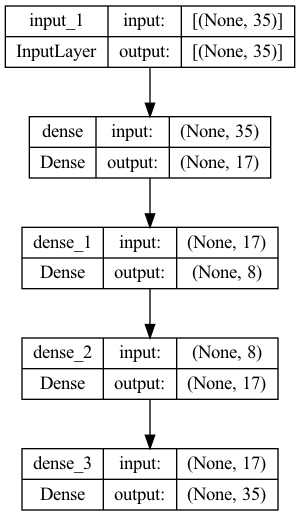

In [21]:
# TensorFlow Implementation

# TensorFlow operates with a static computational graph, which means that the structure of the neural network
# model is defined and fixed before any data is processed. It's akin to setting up a blueprint from which 
# TensorFlow will work every time the model runs. The plot_model utility in TensorFlow provides a visual 
# representation of this predefined model. It illustrates the architecture of the network, including the layers
# and how they are connected. Because the graph is static, the visualization remains the same unless you redefine
# and rebuild the model structure.

# In TensorFlow, the Autoencoder_Simple function is called with the input_size argument, 
# which returns two Keras Model objects: the full autoencoder (decoder) and the encoder. 
# The structure of the model is then visualized using the plot_model function from tensorflow.keras.utils, 
# which generates a diagram of the model architecture and saves it as an image file.

input_size = X.shape[1]
decoder, encoder = Autoencoder_Simple(input_size)
plot_model(decoder, show_shapes=True, to_file='model.png')

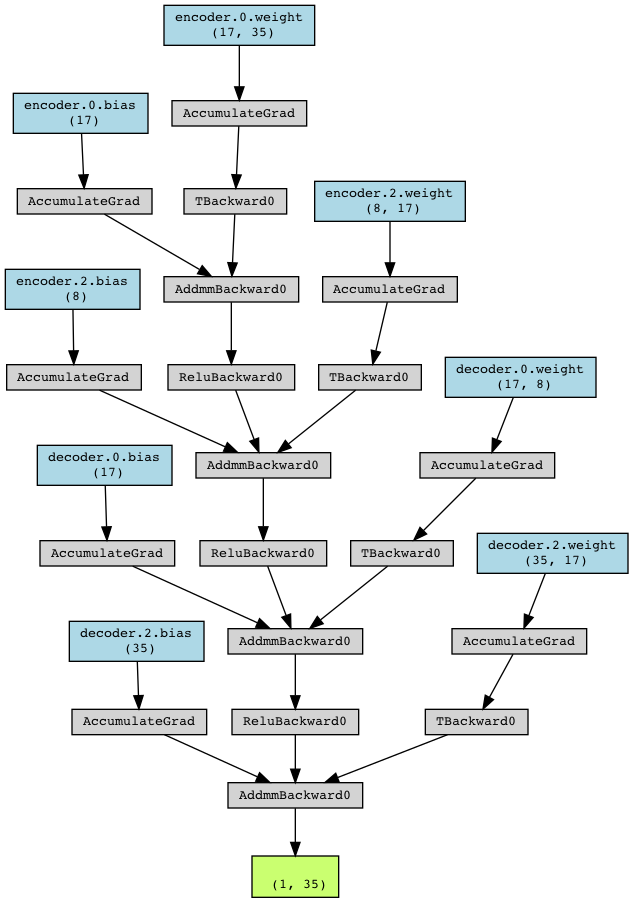

In [30]:
# PyTorch Implementation

# PyTorch, conversely, uses a dynamic computational graph known as the define-by-run approach. 
# In this paradigm, the graph is built on-the-fly as the operations occur during the forward pass of data
# through the network. This means the structure of the neural network can change with each run, as it's
# constructed dynamically based on how the data moves through the model. The torchviz tool generates a graph
# that shows the operations that have occurred and the way tensors have changed as the model processed
# the input data. This visualization is  specific to the particular forward pass and the specific data
# that was processed, so it may change from one batch of datato another.

# In PyTorch, an instance of the Autoencoder_Simple class is created with the input_size argument. 
# This returns a single nn.Module object that contains both the encoder and decoder as submodules. 
# The structure of the model is visualized using the make_dot function from the torchviz library, 
# which generates a graph of the computational operations (i.e., the forward pass) and saves it as an image file.

from torchviz import make_dot

# Set the input size based on the number of features in the dataset
input_size = X.shape[1]
# Call the Autoencoder, passing the input_size as an argument
model = Autoencoder(input_size)

# Visualize the model architecture
x = torch.randn(1, input_size)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()))).render("autoencoder_model", format="png")

from IPython.display import Image
Image('autoencoder_model.png')

## IVc. Model Training <a class="anchor" id="eleven"></a>

In [22]:
# TensorFlow Implementation

# Define the function to train the model
def train_model_with_val_size(X_train_scaled, val_size, n_epochs=15):
    X_train_new, X_val = train_test_split(X_train_scaled, test_size=val_size, random_state=42)
    model, _ = Autoencoder_Simple(X_train_scaled.shape[1])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    history = model.fit(X_train_new, X_train_new, epochs=n_epochs, batch_size=32, validation_data=(X_val, X_val))
    return history.history['loss'], history.history['val_loss']

# Function to calculate the number of data points for a given fraction
def calc_data_points(fraction, total_data_points):
    return int(fraction * total_data_points)

In [23]:
# TensorFlow Training Loop

validation_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Different colors for each validation size
losses_dict_tf = {}

for i, val_size in enumerate(validation_sizes):
    print(f"Training with validation size: {val_size}")
    train_losses, val_losses = train_model_with_val_size(X_train_scaled, val_size)
    losses_dict_tf[val_size] = {'train_losses': train_losses, 'val_losses': val_losses}

Training with validation size: 0.05
Epoch 1/15


2023-12-21 10:12:14.152051: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1577 [..............................] - ETA: 13:24 - loss: 1.0436

2023-12-21 10:12:14.499998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1571/1577 [============================>.] - ETA: 0s - loss: 0.2045

2023-12-21 10:12:22.104407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1577/1577 [==============================] - 8s 5ms/step - loss: 0.2040 - val_loss: 0.0819
Epoch 2/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0942 - val_loss: 0.0520
Epoch 3/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0765 - val_loss: 0.0415
Epoch 4/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0706 - val_loss: 0.0360
Epoch 5/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0638 - val_loss: 0.0333
Epoch 6/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0614 - val_loss: 0.0381
Epoch 7/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0597 - val_loss: 0.0289
Epoch 8/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0570 - val_loss: 0.0288
Epoch 9/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0534 - val_loss: 0.0285
Epoch 10/15
1577/1577 [==============================] - 7s 5ms/step - loss: 0.0521 - val_los

2023-12-21 10:14:04.628111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1486/1494 [============================>.] - ETA: 0s - loss: 0.2487

2023-12-21 10:14:11.510173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1494/1494 [==============================] - 7s 5ms/step - loss: 0.2478 - val_loss: 0.0886
Epoch 2/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.1099 - val_loss: 0.0566
Epoch 3/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0883 - val_loss: 0.0491
Epoch 4/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0809 - val_loss: 0.0429
Epoch 5/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0756 - val_loss: 0.0380
Epoch 6/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0685 - val_loss: 0.0324
Epoch 7/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0643 - val_loss: 0.0331
Epoch 8/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0612 - val_loss: 0.0274
Epoch 9/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0596 - val_loss: 0.0264
Epoch 10/15
1494/1494 [==============================] - 7s 5ms/step - loss: 0.0581 - val_los

2023-12-21 10:15:50.916445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1319/1328 [============================>.] - ETA: 0s - loss: 0.2330

2023-12-21 10:15:57.293564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1328/1328 [==============================] - 7s 5ms/step - loss: 0.2321 - val_loss: 0.1010
Epoch 2/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.1190 - val_loss: 0.0704
Epoch 3/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0980 - val_loss: 0.0563
Epoch 4/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0868 - val_loss: 0.0478
Epoch 5/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0791 - val_loss: 0.0431
Epoch 6/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0733 - val_loss: 0.0420
Epoch 7/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0685 - val_loss: 0.0375
Epoch 8/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0638 - val_loss: 0.0347
Epoch 9/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0572 - val_loss: 0.0326
Epoch 10/15
1328/1328 [==============================] - 7s 5ms/step - loss: 0.0509 - val_los

2023-12-21 10:17:32.194233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1161/1162 [============================>.] - ETA: 0s - loss: 0.2651

2023-12-21 10:17:37.648821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1162/1162 [==============================] - 7s 6ms/step - loss: 0.2650 - val_loss: 0.1057
Epoch 2/15
1162/1162 [==============================] - 6s 6ms/step - loss: 0.1285 - val_loss: 0.0735
Epoch 3/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.1063 - val_loss: 0.0577
Epoch 4/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.0908 - val_loss: 0.0452
Epoch 5/15
1162/1162 [==============================] - 6s 6ms/step - loss: 0.0818 - val_loss: 0.0401
Epoch 6/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.0779 - val_loss: 0.0428
Epoch 7/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.0741 - val_loss: 0.0343
Epoch 8/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.0707 - val_loss: 0.0332
Epoch 9/15
1162/1162 [==============================] - 6s 6ms/step - loss: 0.0671 - val_loss: 0.0311
Epoch 10/15
1162/1162 [==============================] - 6s 5ms/step - loss: 0.0633 - val_los

2023-12-21 10:19:08.227335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


994/996 [============================>.] - ETA: 0s - loss: 0.2050

2023-12-21 10:19:12.971779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


996/996 [==============================] - 6s 6ms/step - loss: 0.2047 - val_loss: 0.1839
Epoch 2/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0627 - val_loss: 0.1405
Epoch 3/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0423 - val_loss: 0.1285
Epoch 4/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0363 - val_loss: 0.1224
Epoch 5/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0332 - val_loss: 0.1200
Epoch 6/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0304 - val_loss: 0.1139
Epoch 7/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0270 - val_loss: 0.1106
Epoch 8/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0237 - val_loss: 0.1158
Epoch 9/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0216 - val_loss: 0.1041
Epoch 10/15
996/996 [==============================] - 6s 6ms/step - loss: 0.0203 - val_loss: 0.1014
Epoch 11/1

2023-12-21 10:20:38.560414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


912/913 [============================>.] - ETA: 0s - loss: 0.2484

2023-12-21 10:20:42.901858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


913/913 [==============================] - 6s 7ms/step - loss: 0.2482 - val_loss: 0.1841
Epoch 2/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0815 - val_loss: 0.1371
Epoch 3/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0554 - val_loss: 0.1211
Epoch 4/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0410 - val_loss: 0.1149
Epoch 5/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0359 - val_loss: 0.1100
Epoch 6/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0332 - val_loss: 0.1072
Epoch 7/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0313 - val_loss: 0.1072
Epoch 8/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0298 - val_loss: 0.1065
Epoch 9/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0287 - val_loss: 0.1063
Epoch 10/15
913/913 [==============================] - 6s 6ms/step - loss: 0.0277 - val_loss: 0.1060
Epoch 11/1

In [31]:
# PyTorch Implementation

# Function to train the model with different validation sizes
def train_model_with_val_size(X_train_scaled, y_train, val_size, n_epochs=100):
    # Split the training data
    X_train_new, X_val, _, _ = train_test_split(X_train_scaled, X_train_scaled, test_size=val_size, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_new, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

    # DataLoader for the training and validation sets
    train_dataset = TensorDataset(X_train_tensor)
    val_dataset = TensorDataset(X_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Initialize the model
    model = Autoencoder(X_train_tensor.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    train_losses, val_losses = [], []
    for epoch in range(n_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for inputs in train_loader:
            inputs = inputs[0]  # Extract inputs tensor from DataLoader
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs in val_loader:
                inputs = inputs[0]  # Extract inputs tensor from DataLoader
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

# Function to calculate the number of data points for a given fraction
def calc_data_points(fraction, total_data_points):
    return int(fraction * total_data_points)

In [32]:
# PyTorch Training Loop

# Train the model for different validation sizes
validation_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Different colors for each validation size
losses_dict_pytorch = {}

for i, val_size in enumerate(validation_sizes):
    print(f"Training with validation size: {val_size}")
    train_losses, val_losses = train_model_with_val_size(X_train_scaled, y_train, val_size)
    losses_dict_pytorch[val_size] = {'train_losses': train_losses, 'val_losses': val_losses}

Training with validation size: 0.05
Training with validation size: 0.1
Training with validation size: 0.2
Training with validation size: 0.3
Training with validation size: 0.4
Training with validation size: 0.45


## IVd. Model Output <a class="anchor" id="twelve"></a>

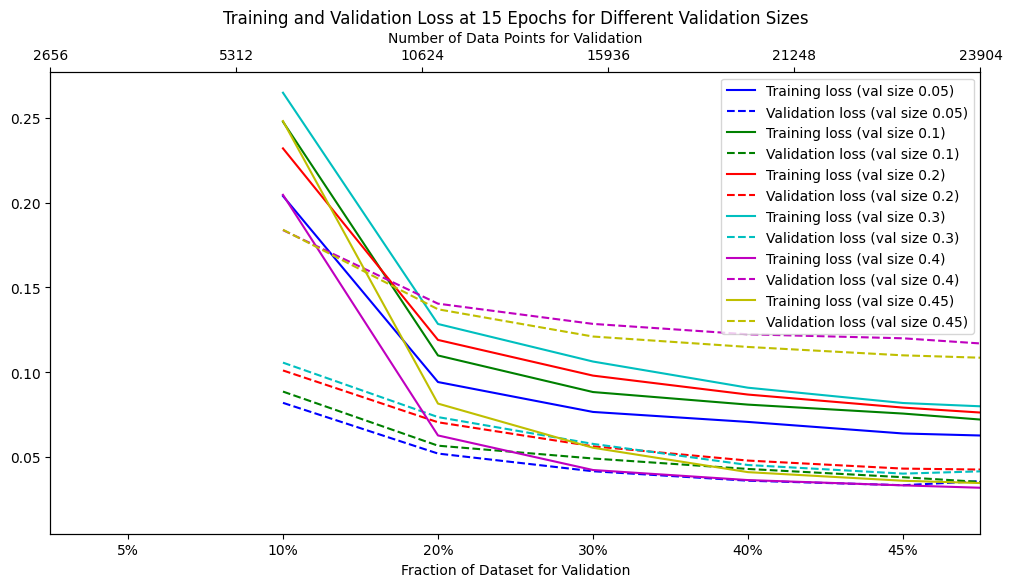

In [24]:
# TensorFlow Implementation

plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis for primary x-axis

# Total number of data points in the dataset
total_data_points = X_train_scaled.shape[0]

for i, val_size in enumerate(validation_sizes):
    color = colors[i]
    epochs = range(1, len(losses_dict_tf[val_size]['train_losses']) + 1)

    # Plotting on primary x-axis
    ax1.plot(epochs, losses_dict_tf[val_size]['train_losses'], color + '-', label=f'Training loss (val size {val_size})')
    ax1.plot(epochs, losses_dict_tf[val_size]['val_losses'], color + '--', label=f'Validation loss (val size {val_size})')

# Setting primary x-axis labels and limits
ax1.set_xlabel('Fraction of Dataset for Validation')
ax1.set_xticks([i for i, _ in enumerate(validation_sizes)])
ax1.set_xticklabels([f"{int(val_size * 100)}%" for val_size in validation_sizes])
ax1.set_xlim(-0.5, len(validation_sizes) - 0.5)

# Creating secondary x-axis
ax2 = ax1.twiny()
ax2.set_xticks([i for i, val_size in enumerate(validation_sizes)])
ax2.set_xticklabels([str(calc_data_points(val_size, total_data_points)) for val_size in validation_sizes])
ax2.set_xlabel('Number of Data Points for Validation')

plt.title('Training and Validation Loss at 15 Epochs for Different Validation Sizes')
plt.ylabel('Loss')
ax1.legend()
plt.show()

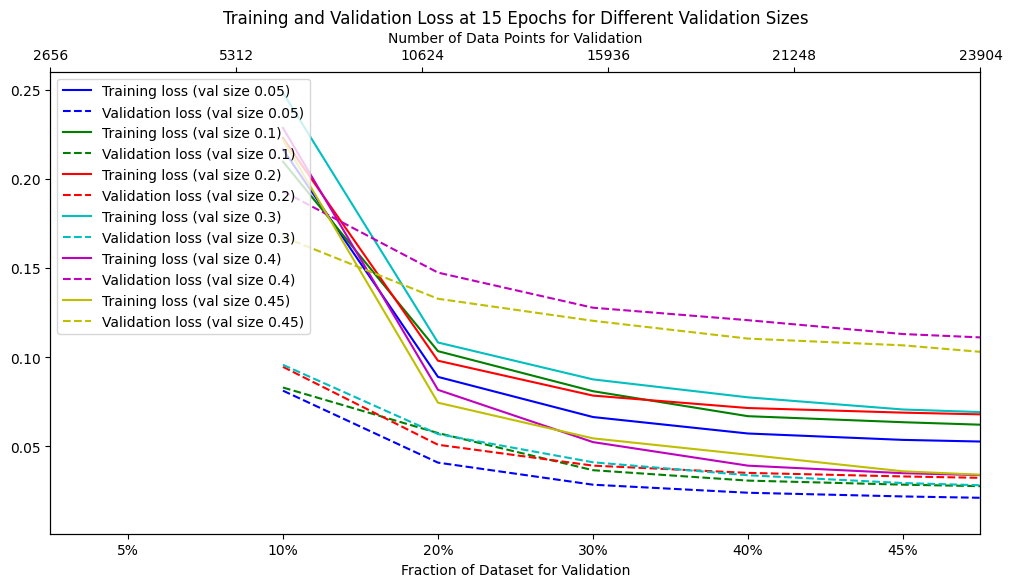

In [35]:
# PyTorch Implementation

# PyTorch Training and Plotting

plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis for primary x-axis

# Total number of data points in the dataset
total_data_points = X_train_scaled.shape[0]

for i, val_size in enumerate(validation_sizes):
    color = colors[i]
    epochs = range(1, len(losses_dict_pytorch[val_size]['train_losses']) + 1)

    # Plotting on primary x-axis
    ax1.plot(epochs, losses_dict_pytorch[val_size]['train_losses'], color + '-', label=f'Training loss (val size {val_size})')
    ax1.plot(epochs, losses_dict_pytorch[val_size]['val_losses'], color + '--', label=f'Validation loss (val size {val_size})')

# Setting primary x-axis labels and limits
ax1.set_xlabel('Fraction of Dataset for Validation')
ax1.set_xticks([i for i, _ in enumerate(validation_sizes)])
ax1.set_xticklabels([f"{int(val_size * 100)}%" for val_size in validation_sizes])
ax1.set_xlim(-0.5, len(validation_sizes) - 0.5)

# Creating secondary x-axis
ax2 = ax1.twiny()
ax2.set_xticks([i for i, val_size in enumerate(validation_sizes)])
ax2.set_xticklabels([str(calc_data_points(val_size, total_data_points)) for val_size in validation_sizes])
ax2.set_xlabel('Number of Data Points for Validation')

plt.title('Training and Validation Loss at 15 Epochs for Different Validation Sizes')
plt.ylabel('Loss')
ax1.legend(loc='upper left')
plt.show()

## V. Transfer Learning <a class="anchor" id="thirteen"></a>

First, we save our trained encoder model for future use. This is crucial as the encoder compresses the data into a latent space, ideal for further analysis and classification tasks.

In [25]:
# TensorFlow Implementation

# Saving the encoder for further use
encoder.save('encoder.h5')

The next step involves transforming both the training and testing data using our trained encoder. This process converts the data into a lower-dimensional, encoded format, making it suitable for classification models.

In [28]:
# TensorFlow Implementation

# Transform the training and testing data using the trained encoder
X_train_scaled_encoded = encoder.predict(X_train_scaled)
X_test_scaled_encoded = encoder.predict(X_test_scaled)

 123/1660 [=>............................] - ETA: 1s

2023-12-21 13:43:07.986555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


130/417 [========>.....................] - ETA: 0s

2023-12-21 13:43:10.446942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 1s 2ms/step


#### Understanding and Visualizing the Latent Space

A crucial aspect of working with autoencoders is gaining an understanding of the latent space – the compressed representation of the data that the encoder part of the model produces. Visualizing and analyzing this latent space can provide deep insights into the characteristics and inherent structure of the data.

Tools for approaching latent space visualization:
Dimensionality Reduction: Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can be used to reduce the dimensions of the latent space to two or three, making it possible to visualize the data in a scatter plot.
Scatter Plots: Once the latent space is reduced to a manageable number of dimensions, scatter plots can be used to visualize the data points. Different colors or markers can represent different original classes (like Star, Galaxy, Quasar), or the output of the classification model.

#### Random Forest Classifier on Latent Space Data

We employ a Random Forest Classifier, a robust and versatile machine learning model, to classify the encoded data. This classifier is known for its high accuracy and ability to handle large datasets with multiple features.

In [29]:
# TensorFlow Implementation

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_features='auto', n_jobs=-1)
model_rf.fit(X_train_scaled_encoded, y_train)

# Make a prediction on the test set
y_pred = model_rf.predict(X_test_scaled_encoded)

# Calculate the accuracy of those predictions
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9578204743320324


#### Post-Classification with Color-Color Plots

To better understand the photometric properties of the astronomical objects in our dataset, we create color-color plots. 
After passing the data through the autoencoder and classifying it with the Random Forest Classifier, we engage in a post-classification analysis. 
The primary goal is to visualize the distribution of classified data (Star, Galaxy, Quasar) in the latent space created by the autoencoder. This visualization helps in understanding the effectiveness of the autoencoder in compressing and representing the data and how well the Random Forest Classifier has performed.

0
1
2
3


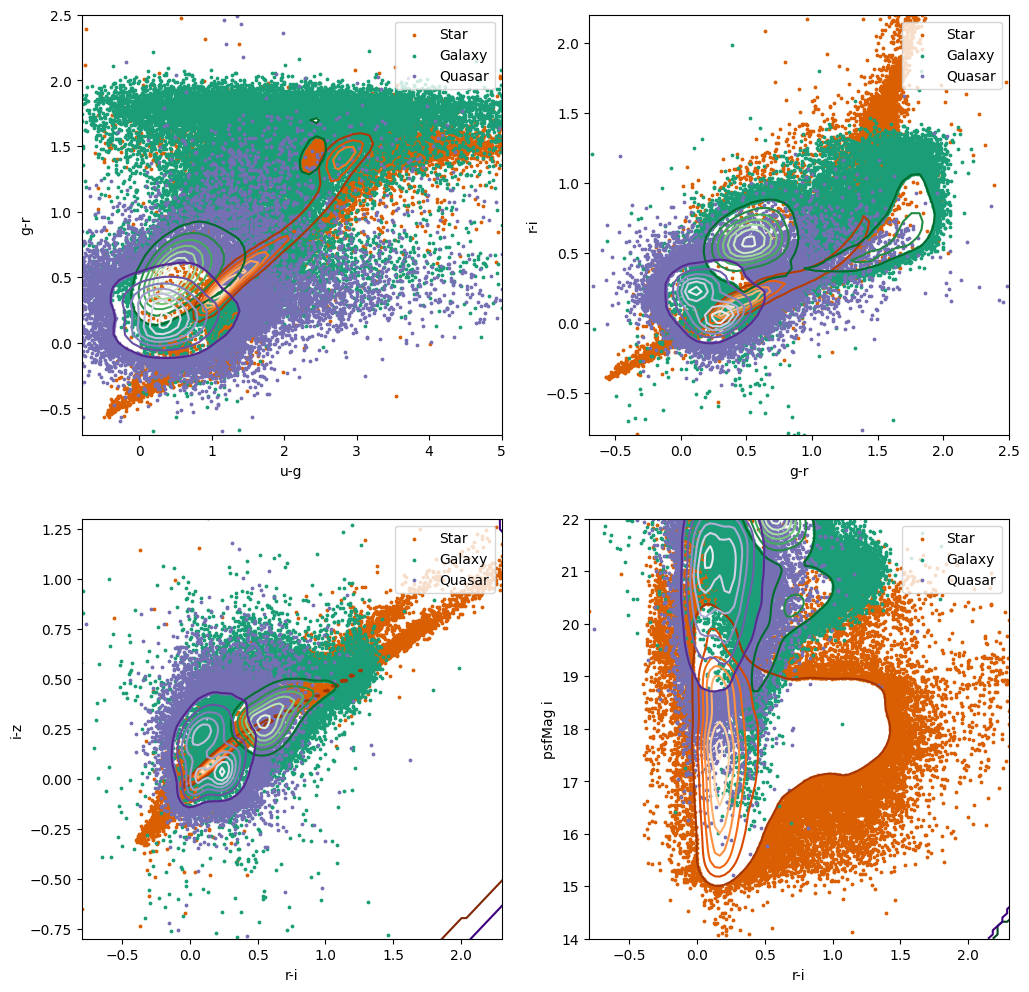

In [30]:
limsugr = np.array([[-2,8], [-2,4]])
limsugr = limsugr.flatten()
limsgri = np.array([[-2,4], [-2,3.5]])
limsgri = limsgri.flatten()
limsriz = np.array([[-1,2.5], [-1,1.5]])
limsriz = limsriz.flatten()
limsriimag = np.array([[-1,2.5], [14,22]])
limsriimag = limsriimag.flatten()
levels = None
nlevel=1

# Make the figure:
#fig,ax = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(2,2,figsize=(12,12))


handles, labels = (0, 0)

    
for i, axis in enumerate(ax.ravel()):
    print(i)

    if i==0: 
        contour_scatter(object_df_new_Star['stdColor_0'], object_df_new_Star['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_0'], object_df_new_Gal['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3, 'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_0'], object_df_new_Quasar['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #Do the unlabeled in another set of plots to avoid confusion
        #contour_scatter(object_df_new_Unlab['stdColor_0'], object_df_new_Unlab['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,5)
        axis.set_ylim(-0.7,2.5)
        axis.set_xlabel('u-g')
        axis.set_ylabel('g-r')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

    if i==1:
        contour_scatter(object_df_new_Star['stdColor_1'], object_df_new_Star['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_1'], object_df_new_Gal['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_1'], object_df_new_Quasar['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_1'], object_df_new_Unlab['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.7,2.5)
        axis.set_ylim(-0.8,2.2)
        axis.set_xlabel('g-r')
        axis.set_ylabel('r-i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==2:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(-0.8,1.3)
        axis.set_xlabel('r-i')
        axis.set_ylabel('i-z')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==3:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3,'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(14,22)
        axis.set_xlabel('r-i')
        axis.set_ylabel('psfMag i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

#### Random Forest Classifier on Original Data

In [35]:
# TensorFlow Implementation

# Random Forest Classifier
model_rf_original = RandomForestClassifier(n_estimators=100, max_features='auto', n_jobs=-1)
model_rf_original.fit(X_train_scaled, y_train)

# Make a prediction on the test set
y_pred_original = model_rf_original.predict(X_test_scaled)

# Calculate the accuracy of those predictions
acc_rf_original = accuracy_score(y_test, y_pred_original)
print(acc_rf_original)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9956469528670069


In [37]:
# Compare the Orginial Data to Latent Space Data

print("Accuracy on Original Data: {:.2f}%".format(acc_rf_original * 100))
print("Accuracy on Latent Space Data: {:.2f}%".format(acc_rf * 100))

Accuracy on Original Data: 99.56%
Accuracy on Latent Space Data: 95.78%


#### Classifying the Entire Dataset

Scale the Full Dataset

Since we have already created a StandardScaler and fitted it to ou training data, we will use this scaler to transform the entire dataset.

In [38]:
# Selecting features from the full dataset
X_full = object_df_new[photometry_columns].drop(['class', 'z'], axis=1)
X_full_scaled = scaler.transform(X_full)  # Scaling the full dataset

 Encode the Full Dataset for Latent Space Analysis
 
If we are using the latent features from the autoencoder, we encode the full dataset with our trained encoder. If we are using the original features, we can skip this step.

In [39]:
# Encoding the full dataset
X_full_scaled_encoded = encoder.predict(X_full_scaled)  

13953/13953 [==============================] - 16s 1ms/step


Classify the Full Dataset

Apply the trained Random Forest model to the entire dataset

In [40]:
# Predicting classes for the full dataset
y_full_pred = model_rf.predict(X_full_scaled_encoded) 

Color-Color Plots

We can categorize the data according to these predictions to prepare for plotting.

In [41]:
# Add predictions to the full dataset
object_df_new['predicted_class'] = y_full_pred

# Filter the data by predicted class
predicted_Star = object_df_new[object_df_new['predicted_class'] == 0]
predicted_Gal = object_df_new[object_df_new['predicted_class'] == 1]
predicted_Quasar = object_df_new[object_df_new['predicted_class'] == 2]

0
1
2
3


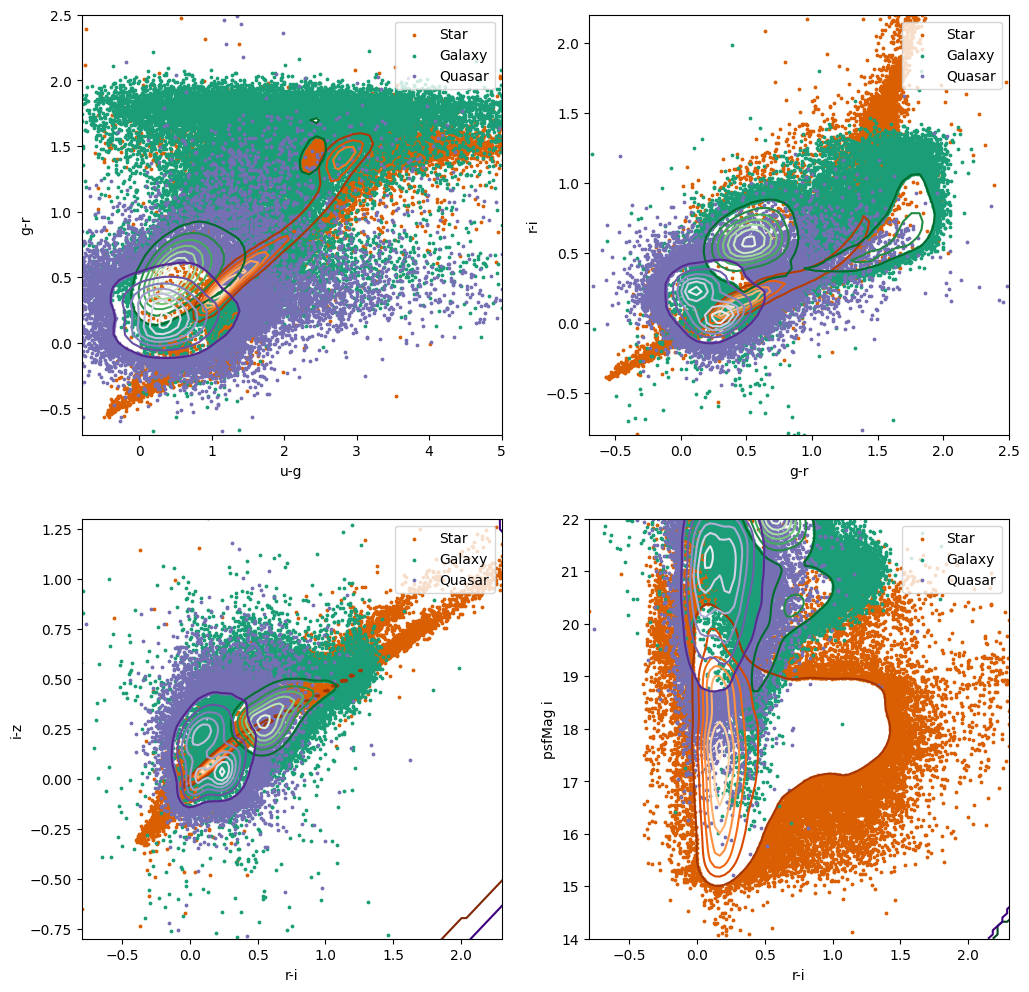

In [42]:
limsugr = np.array([[-2,8], [-2,4]])
limsugr = limsugr.flatten()
limsgri = np.array([[-2,4], [-2,3.5]])
limsgri = limsgri.flatten()
limsriz = np.array([[-1,2.5], [-1,1.5]])
limsriz = limsriz.flatten()
limsriimag = np.array([[-1,2.5], [14,22]])
limsriimag = limsriimag.flatten()
levels = None
nlevel=1

# Make the figure:
#fig,ax = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(2,2,figsize=(12,12))


handles, labels = (0, 0)

    
for i, axis in enumerate(ax.ravel()):
    print(i)

    if i==0: 
        contour_scatter(object_df_new_Star['stdColor_0'], object_df_new_Star['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_0'], object_df_new_Gal['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3, 'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_0'], object_df_new_Quasar['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #Do the unlabeled in another set of plots to avoid confusion
        #contour_scatter(object_df_new_Unlab['stdColor_0'], object_df_new_Unlab['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,5)
        axis.set_ylim(-0.7,2.5)
        axis.set_xlabel('u-g')
        axis.set_ylabel('g-r')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

    if i==1:
        contour_scatter(object_df_new_Star['stdColor_1'], object_df_new_Star['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_1'], object_df_new_Gal['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_1'], object_df_new_Quasar['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_1'], object_df_new_Unlab['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.7,2.5)
        axis.set_ylim(-0.8,2.2)
        axis.set_xlabel('g-r')
        axis.set_ylabel('r-i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==2:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(-0.8,1.3)
        axis.set_xlabel('r-i')
        axis.set_ylabel('i-z')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==3:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3,'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(14,22)
        axis.set_xlabel('r-i')
        axis.set_ylabel('psfMag i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

In [44]:
# Counting the total number of entries in the full dataset
total_entries_full_dataset = len(object_df_new)

# Counting the total number of labeled entries (entries that are not NaN in 'class' column)
total_labeled_entries = object_df_new['class'].notna().sum()

# Printing the counts
print("Total entries in full dataset:", total_entries_full_dataset)
print("Total labeled entries:", total_labeled_entries)
print('Number of unlabeled objects: 13720')

Total entries in full dataset: 446487
Total labeled entries: 432767
Number of unlabeled objects: 13720


850/850 [==============================] - 1s 1ms/step


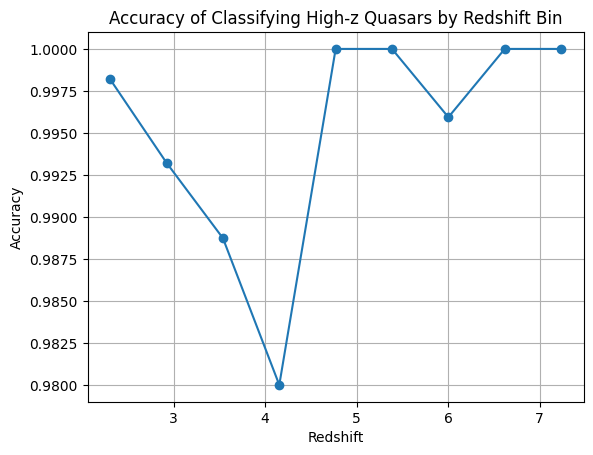

In [46]:
# Filter out high-z quasars (class 2 with redshift > 2)
high_z_quasars = object_df_new[(object_df_new['class'] == 2) & (object_df_new['z'] > 2)]

# Scale the high-z quasar data
X_high_z_quasars = scaler.transform(high_z_quasars[photometry_columns].drop(['class', 'z'], axis=1))

# Encode the scaled data
X_high_z_quasars_encoded = encoder.predict(X_high_z_quasars)

# Use the Random Forest model to predict classes
y_pred_high_z_quasars = model_rf.predict(X_high_z_quasars_encoded)

# Define redshift bins for analysis
redshift_bins = np.linspace(high_z_quasars['z'].min(), high_z_quasars['z'].max(), num=10)

# Function to calculate accuracy in a given redshift bin
def calculate_accuracy_in_bin(y_true, y_pred, mask):
    correct_predictions = np.sum(y_pred[mask] == y_true[mask])
    total_predictions = np.sum(mask)
    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Calculate accuracy in each redshift bin
accuracy_per_bin = []
for i in range(len(redshift_bins) - 1):
    # Create a mask for the current bin
    mask = (high_z_quasars['z'] >= redshift_bins[i]) & (high_z_quasars['z'] < redshift_bins[i+1])
    
    # Calculate accuracy for this bin
    accuracy = calculate_accuracy_in_bin(high_z_quasars['class'], y_pred_high_z_quasars, mask)
    accuracy_per_bin.append(accuracy)

# Calculate mid-points of bins for plotting
mid_points_bins = (redshift_bins[:-1] + redshift_bins[1:]) / 2

# Plotting the Accuracy vs. Redshift graph
plt.plot(mid_points_bins, accuracy_per_bin, marker='o')
plt.xlabel('Redshift')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifying High-z Quasars by Redshift Bin')
plt.grid(True)
plt.show()